In [1]:
import sys
print(sys.version)
print(sys.executable)

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
c:\Users\LOQ\Desktop\graduation1\venv\Scripts\python.exe


In [2]:

import torch
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)


PyTorch version: 2.5.1+cu121
CUDA version: 12.1


In [3]:
# استدعاء المكتبات بعد تثبيتها
import gqlalchemy
import networkx as nx
import numpy as np
import scipy


In [4]:
from gqlalchemy import Memgraph
mg = Memgraph()

In [5]:

mg.execute("MATCH (n) DETACH DELETE n;")
print("Database cleaned.")

Database cleaned.


in powershell/terminal

docker cp "D:\projects\ALZ\alzkb-v2-0-0_memgraph.cypherl" memgraph:/tmp/alzkb-v2-0-0_memgraph.cypherl

docker start memgraph

docker ps

docker exec -i memgraph bash -c "mgconsole < /tmp/alzkb-v2-0-0_memgraph.cypherl"

docker exec -it memgraph mgconsole

MATCH (n) RETURN count(n);

memgraph> MATCH (n) RETURN count(n);
+----------+
| count(n) |
+----------+
| 234037   |
+----------+
1 row in set (round trip in 0.010 sec)

In [6]:
res = mg.execute_and_fetch("MATCH ()-[r]->() RETURN count(r) AS c;")
for r in res:
    print("عدد العلاقات في AlzKB =", r["c"])


عدد العلاقات في AlzKB = 1668487


In [7]:
#خلية 11
#أنواع العلاقات في ALZKB
res = mg.execute_and_fetch("""
MATCH ()-[r]->()
RETURN type(r) AS rel_type, count(*) AS count
ORDER BY count DESC;
""")

for r in res:
    print(r)

{'rel_type': 'GENEPARTICIPATESINBIOLOGICALPROCESS', 'count': 548285}
{'rel_type': 'GENEREGULATESGENE', 'count': 263978}
{'rel_type': 'GENEINPATHWAY', 'count': 178991}
{'rel_type': 'GENEINTERACTSWITHGENE', 'count': 147088}
{'rel_type': 'GENEHASMOLECULARFUNCTION', 'count': 104752}
{'rel_type': 'BODYPARTUNDEREXPRESSESGENE', 'count': 102185}
{'rel_type': 'BODYPARTOVEREXPRESSESGENE', 'count': 97772}
{'rel_type': 'GENEASSOCIATEDWITHCELLULARCOMPONENT', 'count': 88880}
{'rel_type': 'GENECOVARIESWITHGENE', 'count': 61606}
{'rel_type': 'CHEMICALBINDSGENE', 'count': 25726}
{'rel_type': 'CHEMICALDECREASESEXPRESSION', 'count': 21051}
{'rel_type': 'CHEMICALINCREASESEXPRESSION', 'count': 18713}
{'rel_type': 'TRANSCRIPTIONFACTORINTERACTSWITHGENE', 'count': 6910}
{'rel_type': 'DRUGINCLASS', 'count': 1945}
{'rel_type': 'GENEASSOCIATESWITHDISEASE', 'count': 508}
{'rel_type': 'SYMPTOMMANIFESTATIONOFDISEASE', 'count': 53}
{'rel_type': 'DISEASELOCALIZESTOANATOMY', 'count': 33}
{'rel_type': 'DRUGTREATSDISEAS

In [8]:
# خلية 12
# تحديد العقد المرتبطة بالألزهايمر (Disease + Pathway + غيرها)
query = """
MATCH (n)
WITH n, keys(n) AS ks
UNWIND ks AS k
WITH n, k, toString(n[k]) AS val
WHERE toLower(val) CONTAINS "alzheimer"
RETURN labels(n) AS labels, properties(n) AS props
LIMIT 50;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'labels': ['Pathway'], 'props': {'nodeID': '31951.0', 'pathwayId': 'R-HSA-8862803', 'pathwayName': "Deregulated CDK5 triggers multiple neurodegenerative pathways in Alzheimer's disease models", 'sourceDatabase': 'AOPDB - Reactome'}}
{'labels': ['Pathway'], 'props': {'nodeID': '29994.0', 'pathwayId': 'WP2059', 'pathwayName': 'Alzheimers Disease', 'sourceDatabase': 'AOPDB - Wikipathways'}}
{'labels': ['Pathway'], 'props': {'nodeID': '37722.0', 'pathwayId': 'p35alzheimerspathway', 'pathwayName': 'deregulation of cdk5 in alzheimers disease', 'sourceDatabase': 'AOPDB - BioCarta'}}
{'labels': ['Pathway'], 'props': {'nodeID': '37722.0', 'pathwayId': 'p35alzheimerspathway', 'pathwayName': 'deregulation of cdk5 in alzheimers disease', 'sourceDatabase': 'AOPDB - BioCarta'}}
{'labels': ['Pathway'], 'props': {'nodeID': '30103.0', 'pathwayId': 'path:hsa05010', 'pathwayName': 'Alzheimer,s disease', 'sourceDatabase': 'AOPDB - KEGG'}}
{'labels': ['Pathway'], 'props': {'nodeID': '29739.0', 'pathwayId'

In [9]:
# خلية 13
# حساب عدد العقد لكل label في AlzKB

query = """
MATCH (n)
UNWIND labels(n) AS lbl
RETURN lbl AS label, count(*) AS cnt
ORDER BY cnt DESC;
"""

for r in mg.execute_and_fetch(query):
    print(r)

{'label': 'Gene', 'cnt': 193279}
{'label': 'Drug', 'cnt': 16581}
{'label': 'BiologicalProcess', 'cnt': 12322}
{'label': 'Pathway', 'cnt': 4516}
{'label': 'MolecularFunction', 'cnt': 3460}
{'label': 'CellularComponent', 'cnt': 1695}
{'label': 'BodyPart', 'cnt': 652}
{'label': 'TranscriptionFactor', 'cnt': 519}
{'label': 'Symptom', 'cnt': 505}
{'label': 'DrugClass', 'cnt': 474}
{'label': 'Disease', 'cnt': 34}


In [10]:
# إعادة إنشاء الاتصال بوضوح
from gqlalchemy import Memgraph

mg = Memgraph(host="127.0.0.1", port=7687)

# فحص الاتصال بمحاولة تنفيذ أمر بسيط
try:
    mg.execute_and_fetch("RETURN 1;")
    print("✔ Memgraph is running and responding.")
except Exception as e:
    print("❌ Memgraph connection failed:", e)

✔ Memgraph is running and responding.


In [11]:
# خلية 14
# العقد الأكثر اتصالاً داخل الجراف (Top Degree Nodes)
query = """
MATCH (n)-[r]-()
WITH n, count(r) AS degree
RETURN labels(n) AS labels, n.nodeID AS id, degree
ORDER BY degree DESC
LIMIT 20;
"""

for r in mg.execute_and_fetch(query):
    print(r)

{'labels': ['BodyPart'], 'id': '233751.0', 'degree': 10946}
{'labels': ['BodyPart'], 'id': '233172.0', 'degree': 10637}
{'labels': ['Gene'], 'id': '7378.0', 'degree': 9129}
{'labels': ['BodyPart'], 'id': '233184.0', 'degree': 8821}
{'labels': ['BodyPart'], 'id': '233193.0', 'degree': 8742}
{'labels': ['BodyPart'], 'id': '233632.0', 'degree': 8172}
{'labels': ['BodyPart'], 'id': '233190.0', 'degree': 7984}
{'labels': ['BodyPart'], 'id': '233639.0', 'degree': 7190}
{'labels': ['BodyPart'], 'id': '233401.0', 'degree': 7043}
{'labels': ['BodyPart'], 'id': '233394.0', 'degree': 6838}
{'labels': ['BodyPart'], 'id': '231714.0', 'degree': 6788}
{'labels': ['BodyPart'], 'id': '233317.0', 'degree': 5790}
{'labels': ['BodyPart'], 'id': '233547.0', 'degree': 5769}
{'labels': ['BodyPart'], 'id': '233215.0', 'degree': 5717}
{'labels': ['BodyPart'], 'id': '233581.0', 'degree': 5357}
{'labels': ['BodyPart'], 'id': '233171.0', 'degree': 5306}
{'labels': ['BodyPart'], 'id': '233252.0', 'degree': 5219}
{

In [12]:
# خلية 15
# العقد ذات أعلى درجة اتصال
query = """
MATCH (n)-[r]-()
WITH n, count(r) AS deg
RETURN labels(n) AS labels, toString(n.name) AS name, toString(n.nodeID) AS nodeID, deg
ORDER BY deg DESC
LIMIT 20;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'labels': ['BodyPart'], 'name': None, 'nodeID': '233751.0', 'deg': 10946}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233172.0', 'deg': 10637}
{'labels': ['Gene'], 'name': None, 'nodeID': '7378.0', 'deg': 9129}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233184.0', 'deg': 8821}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233193.0', 'deg': 8742}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233632.0', 'deg': 8172}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233190.0', 'deg': 7984}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233639.0', 'deg': 7190}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233401.0', 'deg': 7043}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233394.0', 'deg': 6838}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '231714.0', 'deg': 6788}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233317.0', 'deg': 5790}
{'labels': ['BodyPart'], 'name': None, 'nodeID': '233547.0', 'deg': 5769}
{'labels': ['BodyPart'], 'name': None, 'no

In [13]:
# خلية 16
# جلب كل عقد Disease التي تحمل "alzheimer" في commonName
query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
RETURN d.nodeID AS nodeID, d.commonName AS name, d.sourceDatabase AS source
LIMIT 100;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'nodeID': '233943.0', 'name': 'ALZHEIMER DISEASE 10', 'source': 'DisGeNET'}
{'nodeID': '31192.0', 'name': 'ALZHEIMER DISEASE 18', 'source': 'DisGeNET'}
{'nodeID': '234046.0', 'name': 'ALZHEIMER DISEASE 19', 'source': 'DisGeNET'}
{'nodeID': '34612.0', 'name': 'ALZHEIMER DISEASE 2', 'source': 'DisGeNET'}
{'nodeID': '33189.0', 'name': 'ALZHEIMER DISEASE 4', 'source': 'DisGeNET'}
{'nodeID': '234058.0', 'name': 'ALZHEIMER DISEASE 5', 'source': 'DisGeNET'}
{'nodeID': '233875.0', 'name': 'ALZHEIMER DISEASE 6, LATE-ONSET', 'source': 'DisGeNET'}
{'nodeID': '234210.0', 'name': 'ALZHEIMER DISEASE 9, SUSCEPTIBILITY TO', 'source': 'DisGeNET'}
{'nodeID': '234025.0', 'name': 'ALZHEIMER DISEASE, FAMILIAL, 1', 'source': 'DisGeNET'}
{'nodeID': '234066.0', 'name': 'ALZHEIMER DISEASE, FAMILIAL, 3, WITH SPASTIC PARAPARESIS', 'source': 'DisGeNET'}
{'nodeID': '234067.0', 'name': 'ALZHEIMER DISEASE, FAMILIAL, 3, WITH UNUSUAL PLAQUES', 'source': 'DisGeNET'}
{'nodeID': '234065.0', 'name': 'ALZHEIMER DISEASE, F

In [14]:
# خلية 17
# استخراج الجينات المرتبطة بعقد الألزهايمر
query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)
RETURN toString(g.geneSymbol) AS gene, toString(g.geneName) AS name, count(*) AS hits
ORDER BY hits DESC
LIMIT 50;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'gene': 'APOE', 'name': None, 'hits': 7}
{'gene': 'PSEN1', 'name': None, 'hits': 7}
{'gene': 'PSEN2', 'name': None, 'hits': 6}
{'gene': 'ABCA7', 'name': None, 'hits': 6}
{'gene': 'PRNP', 'name': None, 'hits': 6}
{'gene': 'ADAM10', 'name': None, 'hits': 6}
{'gene': 'ABI3', 'name': None, 'hits': 5}
{'gene': 'CD33', 'name': None, 'hits': 5}
{'gene': 'ADAMTS1', 'name': None, 'hits': 5}
{'gene': 'HLA-DRB5', 'name': None, 'hits': 5}
{'gene': 'IGF1R', 'name': None, 'hits': 5}
{'gene': 'BCL2', 'name': None, 'hits': 5}
{'gene': 'MIR766', 'name': None, 'hits': 5}
{'gene': 'PLAU', 'name': None, 'hits': 5}
{'gene': 'DPYSL2', 'name': None, 'hits': 5}
{'gene': 'APP', 'name': None, 'hits': 5}
{'gene': 'CYP46A1', 'name': None, 'hits': 5}
{'gene': 'DHCR24', 'name': None, 'hits': 5}
{'gene': 'SLC30A4', 'name': None, 'hits': 5}
{'gene': 'EPHA1', 'name': None, 'hits': 5}
{'gene': 'CD2AP', 'name': None, 'hits': 5}
{'gene': 'MAOB', 'name': None, 'hits': 5}
{'gene': 'PCDH11X', 'name': None, 'hits': 5}
{'gen

In [15]:
# فحص خصائص عقد Drug
query = """
MATCH (d:Drug)
RETURN keys(d) AS props
LIMIT 5;
"""

for r in mg.execute_and_fetch(query):
    print(r)

{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}
{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}
{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}
{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}
{'props': ['nodeID', 'xrefCasRN', 'xrefDrugbank', 'commonName', 'sourceDatabase']}


In [16]:
# فحص وجود علاقات بين Drug و Gene
query = """
MATCH (d:Drug)-[r]-(g:Gene)
RETURN DISTINCT type(r) AS rel_type, count(*) AS c
ORDER BY c DESC;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'rel_type': 'CHEMICALBINDSGENE', 'c': 25726}
{'rel_type': 'CHEMICALDECREASESEXPRESSION', 'c': 21051}
{'rel_type': 'CHEMICALINCREASESEXPRESSION', 'c': 18713}


In [17]:
# خلية 18
# جلب الأدوية التي ترتبط/تؤثر على الجينات المرتبطة بالألزهايمر

query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"

MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)

MATCH (drug:Drug)-[
        :CHEMICALBINDSGENE |
        :CHEMICALINCREASESEXPRESSION |
        :CHEMICALDECREASESEXPRESSION
    ]-(g)

RETURN DISTINCT
    toString(drug.commonName) AS drug_name,
    toString(drug.nodeID) AS drug_id,
    count(DISTINCT g) AS related_genes
ORDER BY related_genes DESC
LIMIT 50;
"""

for r in mg.execute_and_fetch(query):
    print(r)

{'drug_name': 'Zinc chloride', 'drug_id': '19794.0', 'related_genes': 13}
{'drug_name': 'Zinc acetate', 'drug_id': '19619.0', 'related_genes': 12}
{'drug_name': 'Zinc', 'drug_id': '8379.0', 'related_genes': 11}
{'drug_name': 'Menadione', 'drug_id': '434.0', 'related_genes': 10}
{'drug_name': 'Crizotinib', 'drug_id': '15463.0', 'related_genes': 9}
{'drug_name': 'Copper', 'drug_id': '14650.0', 'related_genes': 9}
{'drug_name': 'Varenicline', 'drug_id': '9152.0', 'related_genes': 9}
{'drug_name': 'Irinotecan', 'drug_id': '6240.0', 'related_genes': 8}
{'drug_name': 'Doxorubicin', 'drug_id': '5759.0', 'related_genes': 8}
{'drug_name': 'Raloxifene', 'drug_id': '3760.0', 'related_genes': 7}
{'drug_name': 'Topotecan', 'drug_id': '6730.0', 'related_genes': 7}
{'drug_name': 'Chlorpromazine', 'drug_id': '3731.0', 'related_genes': 7}
{'drug_name': 'Idarubicin', 'drug_id': '6142.0', 'related_genes': 7}
{'drug_name': 'Thioridazine', 'drug_id': '6518.0', 'related_genes': 7}
{'drug_name': 'Ponatinib',

In [18]:
# خلية 19
# حساب عدد العقد ضمن مسافة 1-2 hop من أمراض الألزهايمر
query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH p=(d)-[*1..2]-(n)
RETURN count(DISTINCT n) AS nodes_within_2hops, count(p) AS path_count LIMIT 1;
"""
for r in mg.execute_and_fetch(query):
    print(r)

{'nodes_within_2hops': 20552, 'path_count': 190757}


In [19]:
import pandas as pd

# --- الجينات ---
q_genes = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)
RETURN DISTINCT toString(g.nodeID) AS nodeID,
                toString(g.geneSymbol) AS geneSymbol,
                toString(g.geneName) AS geneName;
"""

genes = list(mg.execute_and_fetch(q_genes))
df_genes = pd.DataFrame(genes)
df_genes.to_csv(r"C:\Users\LOQ\Desktop\graduation1\code\alz_genes_list.csv", index=False)

# --- الأدوية ---
q_drugs = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"

MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)

MATCH (drug:Drug)-[
        :CHEMICALBINDSGENE |
        :CHEMICALINCREASESEXPRESSION |
        :CHEMICALDECREASESEXPRESSION
    ]-(g)

RETURN DISTINCT
    toString(drug.nodeID) AS nodeID,
    toString(drug.commonName) AS drugName;
"""

drugs = list(mg.execute_and_fetch(q_drugs))
df_drugs = pd.DataFrame(drugs)
df_drugs.to_csv(r"C:\Users\LOQ\Desktop\graduation1\code\alz_drugs_list.csv", index=False)

print("تم تصدير", len(df_genes), "جين")
print("تم تصدير", len(df_drugs), "دواء")

تم تصدير 103 جين
تم تصدير 861 دواء


In [20]:
# Cell 2 — Extract Alzheimer Disease nodes
alz_disease_query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
RETURN DISTINCT d.nodeID AS nodeID;
"""

alz_disease_nodes = list(mg.execute_and_fetch(alz_disease_query))
print("Alzheimer Disease nodes found:", len(alz_disease_nodes))
alz_disease_nodes[:10]

Alzheimer Disease nodes found: 34


[{'nodeID': '233943.0'},
 {'nodeID': '31192.0'},
 {'nodeID': '234046.0'},
 {'nodeID': '34612.0'},
 {'nodeID': '33189.0'},
 {'nodeID': '234058.0'},
 {'nodeID': '233875.0'},
 {'nodeID': '234210.0'},
 {'nodeID': '234025.0'},
 {'nodeID': '234066.0'}]

In [21]:
# Cell 3 — Extract Alzheimer-associated genes
alz_genes_query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)
RETURN DISTINCT g.nodeID AS nodeID, g.geneSymbol AS symbol;
"""

alz_genes = list(mg.execute_and_fetch(alz_genes_query))
print("Alzheimer Genes:", len(alz_genes))
alz_genes[:10]

Alzheimer Genes: 103


[{'nodeID': '1793.0', 'symbol': 'ADAM10'},
 {'nodeID': '3679.0', 'symbol': 'APOE'},
 {'nodeID': '21601.0', 'symbol': 'PSEN2'},
 {'nodeID': '2409.0', 'symbol': 'ND1'},
 {'nodeID': '2412.0', 'symbol': 'ND2'},
 {'nodeID': '241.0', 'symbol': 'ABCA7'},
 {'nodeID': '1994.0', 'symbol': 'DHCR24'},
 {'nodeID': '30274.0', 'symbol': 'ABI3'},
 {'nodeID': '23154.0', 'symbol': 'ADAMTS1'},
 {'nodeID': '6441.0', 'symbol': 'ATP5F1A'}]

In [22]:
# Cell 4 — Extract Alzheimer-related drugs
alz_drugs_query = """
MATCH (d:Disease)
WHERE toLower(toString(d.commonName)) CONTAINS "alzheimer"
MATCH (d)-[:GENEASSOCIATEDWITHDISEASE|:GENEASSOCIATESWITHDISEASE]-(g:Gene)
MATCH (drug:Drug)-[
        :CHEMICALBINDSGENE |
        :CHEMICALINCREASESEXPRESSION |
        :CHEMICALDECREASESEXPRESSION
    ]-(g)
RETURN DISTINCT drug.nodeID AS nodeID, drug.commonName AS name;
"""

alz_drugs = list(mg.execute_and_fetch(alz_drugs_query))
print("Alzheimer Drugs:", len(alz_drugs))
alz_drugs[:10]

Alzheimer Drugs: 861


[{'nodeID': '3882.0', 'name': 'Betamethasone'},
 {'nodeID': '15463.0', 'name': 'Crizotinib'},
 {'nodeID': '9274.0', 'name': 'Dexamethasone'},
 {'nodeID': '13557.0', 'name': 'Flunarizine'},
 {'nodeID': '3028.0', 'name': 'Fluocinolone acetonide'},
 {'nodeID': '5645.0', 'name': 'Fulvestrant'},
 {'nodeID': '6240.0', 'name': 'Irinotecan'},
 {'nodeID': '4475.0', 'name': 'Levonorgestrel'},
 {'nodeID': '434.0', 'name': 'Menadione'},
 {'nodeID': '4781.0', 'name': 'Mitomycin'}]

In [23]:
# Cell 5 — Build Alzheimer Subgraph node list
alz_nodes = set()

# Add disease nodes
for x in alz_disease_nodes:
    alz_nodes.add(x["nodeID"])

# Add gene nodes
for x in alz_genes:
    alz_nodes.add(x["nodeID"])

# Add drug nodes
for x in alz_drugs:
    alz_nodes.add(x["nodeID"])

print("Total Alzheimer subgraph nodes:", len(alz_nodes))

Total Alzheimer subgraph nodes: 998


In [24]:
# Cell 6 — Extract all edges from the graph
subgraph_edges_query = """
MATCH (a)-[r]-(b)
WHERE a.nodeID IS NOT NULL AND b.nodeID IS NOT NULL
RETURN DISTINCT toString(a.nodeID) AS src,
                type(r) AS rel,
                toString(b.nodeID) AS dst;
"""

edges = list(mg.execute_and_fetch(subgraph_edges_query))
print("Total edges fetched:", len(edges))
edges[:10]

Total edges fetched: 3336974


[{'src': '18028.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '702.0'},
 {'src': '14570.0', 'rel': 'DRUGINCLASS', 'dst': '4715.0'},
 {'src': '14570.0', 'rel': 'DRUGINCLASS', 'dst': '3678.0'},
 {'src': '14570.0', 'rel': 'DRUGINCLASS', 'dst': '4664.0'},
 {'src': '14570.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1077.0'},
 {'src': '8285.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '2267.0'},
 {'src': '8285.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '3756.0'},
 {'src': '8285.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '10549.0'},
 {'src': '6349.0', 'rel': 'DRUGINCLASS', 'dst': '6932.0'},
 {'src': '6349.0', 'rel': 'DRUGINCLASS', 'dst': '812.0'}]

In [25]:
# Cell 7 — Keep only Alzheimer-related edges
filtered_edges = [
    e for e in edges
    if e["src"] in alz_nodes and e["dst"] in alz_nodes
]

print("Alzheimer Subgraph edges:", len(filtered_edges))
filtered_edges[:10]

Alzheimer Subgraph edges: 4232


[{'src': '19508.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1199.0'},
 {'src': '19508.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '10555.0'},
 {'src': '10752.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1199.0'},
 {'src': '5157.0', 'rel': 'CHEMICALDECREASESEXPRESSION', 'dst': '2331.0'},
 {'src': '9089.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1199.0'},
 {'src': '8252.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '4948.0'},
 {'src': '4579.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '1199.0'},
 {'src': '7317.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '60.0'},
 {'src': '7317.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '3449.0'},
 {'src': '7317.0', 'rel': 'CHEMICALBINDSGENE', 'dst': '4349.0'}]

In [26]:
# Cell 8 — Build graph using NetworkX
import networkx as nx

G = nx.Graph()

# Add nodes
G.add_nodes_from(list(alz_nodes))

# Add edges
for e in filtered_edges:
    G.add_edge(e["src"], e["dst"])

print("Graph built:")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Graph built:
Nodes: 998
Edges: 2111


In [27]:
# Cell 9 — Compute basic node features (degree)
import pandas as pd

features = []

for node in G.nodes():
    features.append({
        "nodeID": node,
        "degree": G.degree(node)
    })

df_features = pd.DataFrame(features)
df_features.head()

,nodeID,degree
0,5635.0,2
1,13574.0,4
2,6730.0,7
3,19796.0,1
4,8903.0,1


In [28]:
# Cell 10 — Fetch node labels for each nodeID
def get_label(node_id):
    q = f"""
    MATCH (n {{nodeID: '{node_id}'}})
    RETURN labels(n) AS lbl
    LIMIT 1;
    """
    res = list(mg.execute_and_fetch(q))
    if res:
        return res[0]["lbl"][0]  # first label
    return "Unknown"

df_features["label"] = df_features["nodeID"].apply(get_label)
df_features.head()

,nodeID,degree,label
0,5635.0,2,Drug
1,13574.0,4,Drug
2,6730.0,7,Drug
3,19796.0,1,Drug
4,8903.0,1,Drug


In [29]:
# Cell 11 — One-hot encode the node labels
df_features = pd.get_dummies(df_features, columns=["label"])
df_features.head()

,nodeID,degree,label_Disease,label_Drug,label_Gene
0,5635.0,2,False,True,False
1,13574.0,4,False,True,False
2,6730.0,7,False,True,False
3,19796.0,1,False,True,False
4,8903.0,1,False,True,False


In [30]:
# Cell 12 — Node embeddings (DeepWalk using gensim)

# 1️⃣ استيراد المكتبات
import networkx as nx
import random
from gensim.models import Word2Vec

# 2️⃣ إعداد الـ graph (G) مسبقاً يجب أن يكون موجود
# مثال: G = nx.read_edgelist("your_graph.edgelist")  # أو Graph جاهز بالفعل

# 3️⃣ إعداد random walks
def generate_random_walks(graph, num_walks=10, walk_length=80):
    walks = []
    nodes = list(graph.nodes())
    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = [str(node)]
            current = node
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(current))
                if neighbors:
                    current = random.choice(neighbors)
                    walk.append(str(current))
                else:
                    break
            walks.append(walk)
    return walks

walks = generate_random_walks(G, num_walks=10, walk_length=80)

# 4️⃣ تدريب Word2Vec model على random walks
embedding_model = Word2Vec(
    sentences=walks,
    vector_size=128,   # حجم الـ embedding لكل node
    window=10,         # حجم السياق
    min_count=1,
    sg=1,              # استخدام Skip-Gram
    workers=4,
    epochs=5
)

# 5️⃣ استخراج الـ embeddings لكل node
embeddings = {str(node): embedding_model.wv[str(node)] for node in G.nodes()}

# 6️⃣ مثال على طباعة embeddings لثلاثة nodes
for i, node in enumerate(list(G.nodes())[:3]):
    print(f"Node {node}: {embeddings[str(node)][:10]} ...")  # أول 10 قيم فقط

Node 5635.0: [-0.03396626  0.04316314  0.08236984 -0.21353398 -0.05486681 -0.00512931
  0.30405548 -0.17710686  0.18104522 -0.05542216] ...
Node 13574.0: [-0.1669594   0.05972432  0.04563678  0.04764045  0.16112217 -0.3418907
 -0.11578424  0.03665036  0.00889031  0.2426478 ] ...
Node 6730.0: [-0.18020107 -0.2102818   0.18189484 -0.02153007  0.59435123  0.02558252
 -0.5739608   0.01477335 -0.01316687  0.20632236] ...


In [31]:
# Cell 13 — Convert Embeddings to DataFrame
import pandas as pd
import numpy as np

# تحويل dictionary للـ embeddings إلى DataFrame
embed_df = pd.DataFrame({
    "nodeID": list(embeddings.keys()),
    # تحويل كل numpy array إلى list ليتم تخزينها بسهولة في DataFrame
    "embedding": [embeddings[n].tolist() for n in embeddings]
})

embed_df.head()

,nodeID,embedding
0,5635.0,"[-0.03396626189351082, 0.04316313937306404, 0...."
1,13574.0,"[-0.16695940494537354, 0.059724316000938416, 0..."
2,6730.0,"[-0.18020106852054596, -0.21028180420398712, 0..."
3,19796.0,"[0.19094254076480865, -0.5091882944107056, 0.2..."
4,8903.0,"[-0.012212053872644901, -0.19203630089759827, ..."


In [32]:
# Cell 14 — Merge Features + Embeddings
# التأكد أن df_features موجود مسبقًا ويحتوي على nodeID
merged = df_features.merge(embed_df, on="nodeID", how="left")

# التأكد من عدم وجود قيم مفقودة بعد الدمج
missing_nodes = merged[merged['embedding'].isnull()]
if not missing_nodes.empty:
    print(f"⚠ Warning: {len(missing_nodes)} nodes have no embeddings!")

merged.head()

,nodeID,degree,label_Disease,label_Drug,label_Gene,embedding
0,5635.0,2,False,True,False,"[-0.03396626189351082, 0.04316313937306404, 0...."
1,13574.0,4,False,True,False,"[-0.16695940494537354, 0.059724316000938416, 0..."
2,6730.0,7,False,True,False,"[-0.18020106852054596, -0.21028180420398712, 0..."
3,19796.0,1,False,True,False,"[0.19094254076480865, -0.5091882944107056, 0.2..."
4,8903.0,1,False,True,False,"[-0.012212053872644901, -0.19203630089759827, ..."


In [33]:
save_path = r"C:\Users\LOQ\Desktop\graduation1\code"

merged.to_pickle(save_path + "alz_features.pkl")
embed_df.to_pickle(save_path + "alz_embeddings.pkl")
df_features.to_csv(save_path + "alz_node_features.csv", index=False)

print("✔ Feature Engineering: All files saved successfully.")

✔ Feature Engineering: All files saved successfully.


In [34]:
# Cell 1 — Expand embeddings into numeric feature columns

# DeepWalk embeddings currently stored as lists → convert to matrix
embed_expanded = embed_df["embedding"].apply(pd.Series)
embed_expanded.columns = [f"emb_{i}" for i in range(embed_expanded.shape[1])]

# Append nodeID to allow merging
embed_expanded["nodeID"] = embed_df["nodeID"]

embed_expanded.head()

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,nodeID
0,-0.033966,0.043163,0.082370,-0.213534,-0.054867,-0.005129,0.304055,-0.177107,0.181045,-0.055422,...,-0.046777,-0.076630,0.000394,-0.238957,-0.088962,0.251145,-0.040103,-0.305763,-0.226040,5635.0
1,-0.166959,0.059724,0.045637,0.047640,0.161122,-0.341891,-0.115784,0.036650,0.008890,0.242648,...,-0.306304,-0.475440,-0.062979,0.159473,0.088293,0.089485,0.156619,0.212199,-0.041926,13574.0
2,-0.180201,-0.210282,0.181895,-0.021530,0.594351,0.025583,-0.573961,0.014773,-0.013167,0.206322,...,0.091954,0.173277,0.268960,0.087600,-0.122120,0.051257,0.303375,0.293327,-0.038387,6730.0
3,0.190943,-0.509188,0.253612,-0.078533,0.148588,-0.218913,-0.468328,-0.032801,0.179304,0.180141,...,-0.179625,0.197884,-0.338888,-0.055442,0.137665,-0.141875,0.192748,-0.030931,0.109761,19796.0
4,-0.012212,-0.192036,-0.041752,0.115756,0.257988,-0.208198,-0.211361,0.019236,-0.055525,0.179181,...,0.000803,0.002052,-0.166542,0.072288,-0.107117,-0.161468,-0.181107,-0.076406,-0.221154,8903.0


In [35]:
# Cell 2 — Merge df_features with expanded embeddings

full_df = df_features.merge(embed_expanded, on="nodeID")
full_df.head()

,nodeID,degree,label_Disease,label_Drug,label_Gene,emb_0,emb_1,emb_2,emb_3,emb_4,...,emb_118,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127
0,5635.0,2,False,True,False,-0.033966,0.043163,0.082370,-0.213534,-0.054867,...,0.402265,-0.046777,-0.076630,0.000394,-0.238957,-0.088962,0.251145,-0.040103,-0.305763,-0.226040
1,13574.0,4,False,True,False,-0.166959,0.059724,0.045637,0.047640,0.161122,...,0.030591,-0.306304,-0.475440,-0.062979,0.159473,0.088293,0.089485,0.156619,0.212199,-0.041926
2,6730.0,7,False,True,False,-0.180201,-0.210282,0.181895,-0.021530,0.594351,...,0.202485,0.091954,0.173277,0.268960,0.087600,-0.122120,0.051257,0.303375,0.293327,-0.038387
3,19796.0,1,False,True,False,0.190943,-0.509188,0.253612,-0.078533,0.148588,...,0.078211,-0.179625,0.197884,-0.338888,-0.055442,0.137665,-0.141875,0.192748,-0.030931,0.109761
4,8903.0,1,False,True,False,-0.012212,-0.192036,-0.041752,0.115756,0.257988,...,-0.180211,0.000803,0.002052,-0.166542,0.072288,-0.107117,-0.161468,-0.181107,-0.076406,-0.221154


In [36]:
# Cell 3 — Convert node features into PyTorch tensor
import torch
import numpy as np

# Exclude nodeID and labels to build the feature matrix X
feature_cols = [col for col in full_df.columns
                if col not in ["nodeID", "label_Disease", "label_Drug", "label_Gene"]]

x = torch.tensor(full_df[feature_cols].values, dtype=torch.float)

x.shape

torch.Size([998, 129])

In [37]:
# Cell 4 — Build label vector y for node classification

# Convert one-hot labels into a single integer class
full_df["label"] = full_df[["label_Disease", "label_Drug", "label_Gene"]].idxmax(axis=1)
full_df["label"] = full_df["label"].map({
    "label_Disease": 0,
    "label_Drug": 1,
    "label_Gene": 2
})

y = torch.tensor(full_df["label"].values, dtype=torch.long)

y.shape

torch.Size([998])

In [38]:
# Cell 5 — Create node index mapping (string IDs → integer IDs)

# Create mapping from nodeID to integer index
node_to_idx = {node: idx for idx, node in enumerate(full_df["nodeID"])}

# (optional) reverse mapping if needed later
idx_to_node = {idx: node for node, idx in node_to_idx.items()}

len(node_to_idx)

998

In [39]:
# Cell 6 — Create edge_index tensor using node index mapping

edges = []
for src, dst in G.edges():
    edges.append([node_to_idx[src], node_to_idx[dst]])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

edge_index.shape

torch.Size([2, 2111])

In [40]:
import torch_geometric
from torch_geometric.data import Data
print("✔ PyTorch Geometric installed successfully!")


c:\Users\LOQ\Desktop\graduation1\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✔ PyTorch Geometric installed successfully!


In [41]:
# Cell 7 — Build the full Data object

from torch_geometric.data import Data

data = Data(
    x=x,
    edge_index=edge_index,
    y=y
)

data

Data(x=[998, 129], edge_index=[2, 2111], y=[998])

In [42]:
#Cell 8 — Save the Prepared Graph Data
import torch

torch.save(data, r"C:\Users\LOQ\Desktop\graduation1\code\alz_graph_data.pt")

In [83]:
# Phase 3.1 — Cell 1
# Define positive Drug–Gene relations

RELATION_MAP = {
    "CHEMICALBINDSGENE": 1,
    "CHEMICALINCREASESEXPRESSION": 2,
    "CHEMICALDECREASESEXPRESSION": 3
}

In [84]:
positive_edges_with_labels = []
for edge in filtered_edges:
    rel_name = edge["rel"]
    if rel_name in RELATION_MAP:
        src, dst = edge["src"], edge["dst"]
        label = RELATION_MAP[rel_name]

        src_label = get_label(src)
        dst_label = get_label(dst)

        # توحيد الاتجاه: دواء -> جين
        if src_label == "Drug" and dst_label == "Gene":
            positive_edges_with_labels.append(((src, dst), label))
        elif src_label == "Gene" and dst_label == "Drug":
            positive_edges_with_labels.append(((dst, src), label))

print(f"Total positive samples: {len(positive_edges_with_labels)}")
from collections import Counter
counts = Counter([item[1] for item in positive_edges_with_labels])
print("Distribution (1: Binds, 2: Increases, 3: Decreases):")
print(dict(counts))

Total positive samples: 2930
Distribution (1: Binds, 2: Increases, 3: Decreases):
{1: 2166, 3: 248, 2: 516}


In [85]:
# Phase 4 — Cell 3

import random

existing_positive_pairs = set([pair for pair, label in positive_edges_with_labels])

drug_nodes = df_features[df_features["label_Drug"]]["nodeID"].tolist()
gene_nodes = df_features[df_features["label_Gene"]]["nodeID"].tolist()

negative_samples = []
target_count = len(positive_edges_with_labels)

while len(negative_samples) < target_count:
    d = random.choice(drug_nodes)
    g = random.choice(gene_nodes)
    if (d, g) not in existing_positive_pairs:
        negative_samples.append(((d, g), 0))
negative_samples = list(set(negative_samples))
print("Negative samples (Class 0):", len(negative_samples))

Negative samples (Class 0): 2883


In [86]:
import torch
import torch.nn.functional as F
deg = torch.zeros(data.num_nodes, 1).to(data.x.device)
deg.index_add_(0, data.edge_index[0], torch.ones_like(data.edge_index[0]).float().unsqueeze(1))
norm_deg = (deg - deg.mean()) / (deg.std() + 1e-9)
pagerank = torch.rand(data.num_nodes, 1).to(data.x.device)  # placeholder
new_features = torch.cat([data.x, norm_deg, pagerank], dim=1)
data.x = new_features
print("New feature dimension:", data.x.shape)

New feature dimension: torch.Size([998, 133])


In [87]:
# Phase 3.3 — Cell 1
# Helper function to get node embedding

def get_embedding(node_id):
    row = embed_expanded[embed_expanded["nodeID"] == node_id]
    return row.drop(columns=["nodeID"]).values[0]

In [88]:
# Phase 3.3 — Cell 2
# Build edge-level feature matrix

import numpy as np

X_multi = []
y_multi = []
#  معالجة العينات الإيجابية (الفئات: 1، 2، 3)
# نستخدم القائمة التي أنشأناها في Phase 4 Cell 2
for (d, g), label in positive_edges_with_labels:
    emb_d = get_embedding(d)
    emb_g = get_embedding(g)
    X_multi.append(np.concatenate([emb_d, emb_g]))
    y_multi.append(label)

#  معالجة العينات السلبية (الفئة: 0)
# نستخدم القائمة التي أنشأناها في Phase 4 Cell 3
for (d, g), label in negative_samples:
    emb_d = get_embedding(d)
    emb_g = get_embedding(g)
    X_multi.append(np.concatenate([emb_d, emb_g]))
    y_multi.append(label)

X_multi = np.array(X_multi)
y_multi = np.array(y_multi)

print(" Multi-class Feature Matrix Built")
print("X_multi shape:", X_multi.shape)
print("y_multi shape:", y_multi.shape)

# التأكد من توزيع الفئات
unique, counts = np.unique(y_multi, return_counts=True)
print("Classes distribution (0:None, 1:Binds, 2:Increases, 3:Decreases):")
print(dict(zip(unique, counts)))

 Multi-class Feature Matrix Built
X_multi shape: (5813, 256)
y_multi shape: (5813,)
Classes distribution (0:None, 1:Binds, 2:Increases, 3:Decreases):
{0: 2883, 1: 2166, 2: 516, 3: 248}


In [89]:
import random
import numpy as np
from sklearn.model_selection import train_test_split

#  تجميع كل العينات مع تسمياتها الصحيحة (0، 1، 2، 3)
# استخدمنا القوائم التي جهزناها سابقاً في الخطوات الماضية
all_samples = positive_edges_with_labels + negative_samples

random.shuffle(all_samples)

#  فصل الحواف (edges) عن التسميات (labels)
edges_list = [item[0] for item in all_samples]
labels_list = [item[1] for item in all_samples]

#  تقسيم البيانات باستخدام Stratify لضمان توزيع الفئات بشكل عادل
# تقسيم 20% للاختبار
train_val_edges, test_edges, train_val_labels, test_labels = train_test_split(
    edges_list, labels_list, test_size=0.2, random_state=42, stratify=labels_list
)

train_edges, val_edges, train_labels, val_labels = train_test_split(
    train_val_edges, train_val_labels, test_size=0.125, random_state=42, stratify=train_val_labels
)

#  بناء الميزات (X) لكل مجموعة
def build_features_multi(edges):
    X = []
    for d, g in edges:
        X.append(np.concatenate([get_embedding(d), get_embedding(g)]))
    return np.array(X)

X_train, y_train = build_features_multi(train_edges), np.array(train_labels)
X_val,   y_val   = build_features_multi(val_edges),   np.array(val_labels)
X_test,  y_test  = build_features_multi(test_edges),  np.array(test_labels)

print(" Multi-class Split Completed ")
print("X_train shape:", X_train.shape, "| Classes:", np.unique(y_train, return_counts=True))
print("X_val shape:", X_val.shape,   "| Classes:", np.unique(y_val, return_counts=True))
print("X_test shape:", X_test.shape, "| Classes:", np.unique(y_test, return_counts=True))

 Multi-class Split Completed 
X_train shape: (4068, 256) | Classes: (array([0, 1, 2, 3]), array([2018, 1516,  361,  173], dtype=int64))
X_val shape: (582, 256) | Classes: (array([0, 1, 2, 3]), array([288, 217,  52,  25], dtype=int64))
X_test shape: (1163, 256) | Classes: (array([0, 1, 2, 3]), array([577, 433, 103,  50], dtype=int64))


In [90]:
import torch

device = torch.device("cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

print(f"✔ Tensors are ready on device: {device}")

✔ Tensors are ready on device: cpu


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams["font.family"] = "DejaVu Sans"

In [92]:
import torch
import torch.nn.functional as F

class MultiClassFocalLoss(torch.nn.Module):
    def __init__(self, gamma=2, weight=None):
        super(MultiClassFocalLoss, self).__init__()
        self.gamma = gamma

        # هذا السطر الجديد 🔑
        if weight is not None:
            self.register_buffer("weight", weight)  # ينقل تلقائيًا على CPU/GPU مع الـ module
        else:
            self.weight = None

    def forward(self, logits, targets):
        # logits: [N, 4] (مخرجات الشبكة لكل فئة)
        # targets: [N] (الأرقام 0، 1، 2، 3)
        ce_loss = F.cross_entropy(logits, targets, reduction='none', weight=self.weight)
        # حساب الاحتمالية pt
        pt = torch.exp(-ce_loss)
        # تطبيق معادلة Focal Loss للمصنف المتعدد
        focal_loss = ((1 - pt) ** self.gamma * ce_loss).mean()
        return focal_loss

# حساب الأوزان أولاً (لأن الفئة 3 عددها قليل جداً مقارنة بالفئة 0)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train_cpu = y_train_tensor.cpu().numpy()
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_cpu), y=y_train_cpu)
weights_tensor = torch.tensor(weights, dtype=torch.float).to(device)

# تعريف المعيار (Criterion) الجديد
criterion = MultiClassFocalLoss(gamma=2, weight=weights_tensor)
criterion = criterion.to(device)  # بس للتأكيد، الآن ينقل weight تلقائيًا
print(f"✔ Multi-Class Focal Loss ready with class weights: {weights}")

✔ Multi-Class Focal Loss ready with class weights: [0.50396432 0.67084433 2.81717452 5.87861272]


In [93]:
from torch_geometric.nn import RGCNConv, RGATConv
import torch.nn as nn
import torch.nn.functional as F

in_dim = data.x.size(1) # 131
hidden_dim = 256  # رفعنا السعة من 128 إلى 256
num_classes = 4
num_relations = 1
heads = 4

#  RGCN 

class Advanced_RGCN(nn.Module):
    def __init__(self, in_dim, hidden_dim, num_classes, num_rel):
        super().__init__()
        self.conv1 = RGCNConv(in_dim, hidden_dim, num_rel)
        self.conv2 = RGCNConv(hidden_dim, hidden_dim, num_rel)
        
        self.ln1 = nn.LayerNorm(hidden_dim)
        self.ln2 = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.3)

        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.GELU(), # GELU أفضل من ReLU في هذه المهام
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.GELU(),
            nn.Linear(hidden_dim // 2, num_classes)
        )

    def encode(self, x, edge_index, edge_type):
        h1 = self.conv1(x, edge_index, edge_type)
        h1 = self.ln1(torch.relu(h1))
        h1 = self.dropout(h1)
        
        h2 = self.conv2(h1, edge_index, edge_type)
        h2 = self.ln2(torch.relu(h2))
        
        return h1 + h2 

    def decode(self, h, edges):
        src = h[edges[:, 0]]
        dst = h[edges[:, 1]]
        z = torch.cat([src, dst], dim=1)
        return self.edge_mlp(z)


#  RGAT

class Advanced_RGAT(nn.Module):
    def __init__(self, in_dim, hidden_dim, num_classes, num_rel, heads=4):
        super().__init__()
        # استخدام Multi-head
        self.conv1 = RGATConv(in_dim, hidden_dim // heads, num_rel, heads=heads)
        self.conv2 = RGATConv(hidden_dim, hidden_dim // heads, num_rel, heads=heads)
        
        self.ln1 = nn.LayerNorm(hidden_dim)
        self.ln2 = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.3)

        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes)
        )

    def encode(self, x, edge_index, edge_type):
        h1 = self.conv1(x, edge_index, edge_type)
        h1 = self.ln1(torch.relu(h1))
        h1 = self.dropout(h1)
        
        h2 = self.conv2(h1, edge_index, edge_type)
        h2 = self.ln2(torch.relu(h2))
        
        return h1 + h2

    def decode(self, h, edges):
        src = h[edges[:, 0]]
        dst = h[edges[:, 1]]
        z = torch.cat([src, dst], dim=1)
        return self.edge_mlp(z)


rgcn_multi = Advanced_RGCN(in_dim, hidden_dim, num_classes, num_relations).to(device)
rgat_multi = Advanced_RGAT(in_dim, hidden_dim, num_classes, num_relations, heads=heads).to(device)

print("Advanced Architectures Ready: Deepened MLPs, Residual Connections, and Multi-head Attention.")

Advanced Architectures Ready: Deepened MLPs, Residual Connections, and Multi-head Attention.


In [94]:
import torch
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report

def evaluate_edges_multiclass(model, h, edge_pairs, labels, criterion):
    """
    labels: tensor [num_edges] (يحتوي على القيم 0, 1, 2, 3)
    """
    model.eval()
    with torch.no_grad():
        #  الحصول على المخرجات (Logits) بحجم [N, 4]
        logits = model.decode(h, edge_pairs)
        #  تحويل المخرجات إلى احتمالات باستخدام Softmax
        probs = F.softmax(logits, dim=1)
        # اختيار الفئة ذات الاحتمالية الأعلى للتنبؤ
        preds = torch.argmax(logits, dim=1)
        #  حساب الخسارة (Labels هنا يجب أن تكون Long وليس Float)
        loss = criterion(logits, labels).item()
        # الحسابات الإحصائية
        acc = accuracy_score(labels.cpu(), preds.cpu())
        f1  = f1_score(labels.cpu(), preds.cpu(), average='macro')
        #  AUC للمصنف المتعدد (طريقة One-vs-Rest)
        try:
            auc = roc_auc_score(labels.cpu(), probs.cpu(), multi_class='ovr', average='macro')
        except:
            auc = 0.0
    return loss, acc, f1, auc

class EarlyStopper:
    def __init__(self, patience=40):
        self.best_f1 = -1
        self.patience = patience
        self.counter = 0
        self.best_state = None

    def step(self, f1, model):
        if f1 > self.best_f1:
            self.best_f1 = f1
            self.counter = 0
            self.best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        else:
            self.counter += 1

        return self.counter >= self.patience

print("Multi-class Metrics and EarlyStopper are ready.")

Multi-class Metrics and EarlyStopper are ready.


In [95]:
def train_multiclass_predictor(model, data,
                               train_edges_tensor, y_train_tensor,
                               val_edges_tensor,   y_val_tensor,
                               lr=0.001, wd=1e-4, epochs=300):

    opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    stopper = EarlyStopper(patience=50)
    
    # قوائم لحفظ قيم التدريب للرسم البياني
    train_losses = []
    val_losses = []
    val_f1_scores = []
    val_accuracies = []

    for ep in range(1, epochs + 1):
        model.train()
        opt.zero_grad()
        h = model.encode(data.x, data.edge_index, data.edge_type)
        logits = model.decode(h, train_edges_tensor)
        loss = criterion(logits, y_train_tensor) 
        
        loss.backward()
        opt.step()

        h_val = model.encode(data.x, data.edge_index, data.edge_type)
        val_loss, val_acc, val_f1, val_auc = evaluate_edges_multiclass(
            model, h_val, val_edges_tensor, y_val_tensor, criterion
        )
        
        # حفظ القيم للرسم البياني
        train_losses.append(loss.item())
        val_losses.append(val_loss)
        val_f1_scores.append(val_f1)
        val_accuracies.append(val_acc)

        if ep % 10 == 0 or ep == 1:
            print(f"[{model.__class__.__name__}] "
                  f"E{ep:03d} | "
                  f"Loss={loss.item():.4f} | "
                  f"V_Loss={val_loss:.4f} | "
                  f"V_Acc={val_acc:.3f} | "
                  f"V_F1={val_f1:.3f} | "
                  f"V_AUC={val_auc:.3f}")

        if stopper.step(val_f1, model):
            print(f"Early stopping at epoch {ep}")
            break

    if stopper.best_state is not None:
        model.load_state_dict(stopper.best_state)
    
    # حفظ تاريخ التدريب في النموذج
    model.training_history = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'val_f1_scores': val_f1_scores,
        'val_accuracies': val_accuracies
    }
    
    return model

print("Multi-class Training Function is ready.")

Multi-class Training Function is ready.


In [96]:
def plot_learning_curves(model, model_name="Model"):
    import matplotlib.pyplot as plt

    # =======================
    # 1. Validate history
    # =======================
    if not hasattr(model, "training_history"):
        raise AttributeError("❌ model does not have 'training_history' attribute")

    history = model.training_history
    required_keys = [
        "train_losses",
        "val_losses",
        "val_f1_scores",
        "val_accuracies"
    ]

    for key in required_keys:
        if key not in history:
            raise KeyError(f"❌ Missing key in training_history: '{key}'")

    length = len(history["train_losses"])
    if not all(len(history[k]) == length for k in required_keys):
        raise ValueError("❌ All training history lists must have the same length")

    epochs = range(1, length + 1)

    # =======================
    # 2. Create plots
    # =======================
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(
        f"{model_name} – Training Analysis",
        fontsize=18,
        fontweight="bold",
        y=0.97
    )

    # ---- Loss Curves ----
    ax1.plot(
        epochs,
        history["train_losses"],
        label="Training Loss",
        linewidth=2.5
    )
    ax1.plot(
        epochs,
        history["val_losses"],
        label="Validation Loss",
        linewidth=2.5
    )
    ax1.set_title("Loss Curves", fontsize=15, fontweight="bold")
    ax1.set_xlabel("Epochs", fontsize=13)
    ax1.set_ylabel("Loss", fontsize=13)
    ax1.legend()
    ax1.grid(True, linestyle="--", alpha=0.3)

    # ---- Performance Metrics ----
    ax2.plot(
        epochs,
        history["val_f1_scores"],
        label="F1 Score",
        linewidth=2.5
    )
    ax2.plot(
        epochs,
        history["val_accuracies"],
        label="Accuracy",
        linewidth=2.5
    )
    ax2.set_title("Performance Metrics", fontsize=15, fontweight="bold")
    ax2.set_xlabel("Epochs", fontsize=13)
    ax2.set_ylabel("Score", fontsize=13)
    ax2.legend()
    ax2.grid(True, linestyle="--", alpha=0.3)

    # =======================
    # 3. Layout & save
    # =======================
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)

    plt.savefig(
        f"{model_name}_learning_curves.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()

    # =======================
    # 4. Console statistics
    # =======================
    print("\n" + "=" * 60)
    print(f"📊 Training Summary | {model_name}")
    print("=" * 60)
    print(f"🔁 Total Epochs           : {length}")
    print(f"🏆 Best F1 Score          : {max(history['val_f1_scores']):.4f}")
    print(f"🎯 Best Accuracy          : {max(history['val_accuracies']):.4f}")
    print(f"📉 Final Training Loss    : {history['train_losses'][-1]:.4f}")
    print(f"📉 Final Validation Loss  : {history['val_losses'][-1]:.4f}")
    print(f"⬇️  Lowest Training Loss  : {min(history['train_losses']):.4f}")
    print(f"⬇️  Lowest Validation Loss: {min(history['val_losses']):.4f}")
    print("=" * 60)


print("✅ Enhanced learning curves function ready!")

✅ Enhanced learning curves function ready!


In [ ]:
def plot_confusion_matrix(model, data, test_edges_tensor, y_test_tensor, model_name="Model"):
    import torch
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import confusion_matrix, classification_report

    # =======================
    # 1. Evaluation mode
    # =======================
    model.eval()

    with torch.no_grad():
        h = model.encode(data.x, data.edge_index, data.edge_type)
        logits = model.decode(h, test_edges_tensor)

        if logits.ndim != 2:
            raise ValueError("❌ Model output logits must be 2D [N, num_classes]")

        predictions = torch.argmax(logits, dim=1).cpu().numpy()
        true_labels = y_test_tensor.cpu().numpy()

    if len(predictions) != len(true_labels):
        raise ValueError("❌ Predictions and true labels length mismatch")

    # =======================
    # 2. Confusion Matrix
    # =======================
    class_names = [
        "No Relation",
        "Binds",
        "Increases Expression",
        "Decreases Expression"
    ]

    cm = confusion_matrix(true_labels, predictions)

    # =======================
    # 3. Plot
    # =======================
    plt.figure(figsize=(10, 8))

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        linewidths=0.5,
        linecolor="gray",
        cbar_kws={"label": "Samples count"}
    )

    plt.title(
        f"{model_name} – Confusion Matrix",
        fontsize=16,
        fontweight="bold",
        pad=20
    )
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.savefig(
        f"{model_name}_confusion_matrix.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()

    # =======================
    # 4. Classification Report
    # =======================
    print("\n" + "=" * 70)
    print(f"📋 Classification Report | {model_name}")
    print("=" * 70)
    print(
        classification_report(
            true_labels,
            predictions,
            target_names=class_names,
            digits=4
        )
    )

    # =======================
    # 5. Per-class accuracy
    # =======================
    print("🎯 Per-Class Accuracy")
    print("-" * 40)

    class_accuracies = np.divide(
        cm.diagonal(),
        cm.sum(axis=1),
        out=np.zeros_like(cm.diagonal(), dtype=float),
        where=cm.sum(axis=1) != 0
    )

    for class_name, acc, correct, total in zip(
        class_names,
        class_accuracies,
        cm.diagonal(),
        cm.sum(axis=1)
    ):
        print(f"• {class_name:<22}: {acc:.3f}  ({correct}/{total})")

    print("=" * 70)

    return cm


print("✅ The function of drawing the confusion matrix is ​​ready!")

✅ دالة رسم مصفوفة التشويش جاهزة!


In [98]:

node_to_idx = {node_id: idx for idx, node_id in enumerate(df_features["nodeID"])}

def convert_edges_to_index_pairs(edge_list):
    pairs = []
    for d, g in edge_list:
        pairs.append([node_to_idx[d], node_to_idx[g]])
    return torch.tensor(pairs, dtype=torch.long).to(device)

train_edges_tensor = convert_edges_to_index_pairs(train_edges)
val_edges_tensor   = convert_edges_to_index_pairs(val_edges)
test_edges_tensor  = convert_edges_to_index_pairs(test_edges)

In [99]:

device = torch.device("cpu")
#  إنشاء مصفوفة edge_type بحجم عدد الحواف في الجراف
# data.edge_index.size(1) يعطينا عدد الحواف الكلي
num_edges = data.edge_index.size(1)
data.edge_type = torch.zeros(num_edges, dtype=torch.long).to(device)

#  التأكد من نقل كل شيء للجهاز (GPU/CPU)
data.x = data.x.to(device)
data.edge_index = data.edge_index.to(device)

print(f" Added edge_type to data object. Shape: {data.edge_type.shape}")

 Added edge_type to data object. Shape: torch.Size([2111])


In [100]:
import torch

device = torch.device("cpu")

model = rgcn_multi.to(device)
criterion = criterion.to(device)   # 👈 هذا هو السطر المهم
model.train()

data = data.to(device)
train_edges_tensor = train_edges_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

h = model.encode(data.x, data.edge_index, data.edge_type)
logits = model.decode(h, train_edges_tensor)

loss = criterion(logits, y_train_tensor)

optimizer.zero_grad()
loss.backward()
optimizer.step()

print("Loss:", loss.item())

Loss: 0.9021689891815186


In [101]:

data.edge_type = torch.zeros(data.edge_index.size(1), dtype=torch.long, device=data.x.device)

print(" Starting Multi-Class Training (4 Categories)")
print("\n Training RGCN (Multi-Class) ")
rgcn_multi = train_multiclass_predictor(
    rgcn_multi, data,
    train_edges_tensor, y_train_tensor,
    val_edges_tensor,   y_val_tensor,
    epochs=300
)

print("\n Training RGAT (Multi-Class)")
rgat_multi = train_multiclass_predictor(
    rgat_multi, data,
    train_edges_tensor, y_train_tensor,
    val_edges_tensor,   y_val_tensor,
    epochs=300
)

 Starting Multi-Class Training (4 Categories)

 Training RGCN (Multi-Class) 
[Advanced_RGCN] E001 | Loss=0.8170 | V_Loss=0.7634 | V_Acc=0.459 | V_F1=0.353 | V_AUC=0.783
[Advanced_RGCN] E010 | Loss=0.5021 | V_Loss=0.4906 | V_Acc=0.689 | V_F1=0.566 | V_AUC=0.898
[Advanced_RGCN] E020 | Loss=0.3547 | V_Loss=0.4120 | V_Acc=0.749 | V_F1=0.641 | V_AUC=0.926
[Advanced_RGCN] E030 | Loss=0.3059 | V_Loss=0.3910 | V_Acc=0.784 | V_F1=0.672 | V_AUC=0.936
[Advanced_RGCN] E040 | Loss=0.2534 | V_Loss=0.4156 | V_Acc=0.797 | V_F1=0.673 | V_AUC=0.946
[Advanced_RGCN] E050 | Loss=0.2173 | V_Loss=0.3452 | V_Acc=0.820 | V_F1=0.703 | V_AUC=0.952
[Advanced_RGCN] E060 | Loss=0.2084 | V_Loss=0.3389 | V_Acc=0.821 | V_F1=0.718 | V_AUC=0.947
[Advanced_RGCN] E070 | Loss=0.1819 | V_Loss=0.2786 | V_Acc=0.833 | V_F1=0.745 | V_AUC=0.957
[Advanced_RGCN] E080 | Loss=0.1651 | V_Loss=0.3480 | V_Acc=0.833 | V_F1=0.730 | V_AUC=0.954
[Advanced_RGCN] E090 | Loss=0.1692 | V_Loss=0.2938 | V_Acc=0.818 | V_F1=0.715 | V_AUC=0.951
[Ad


📈 Plotting Learning Curves for Trained Models

🚀 Processing RGCN model...


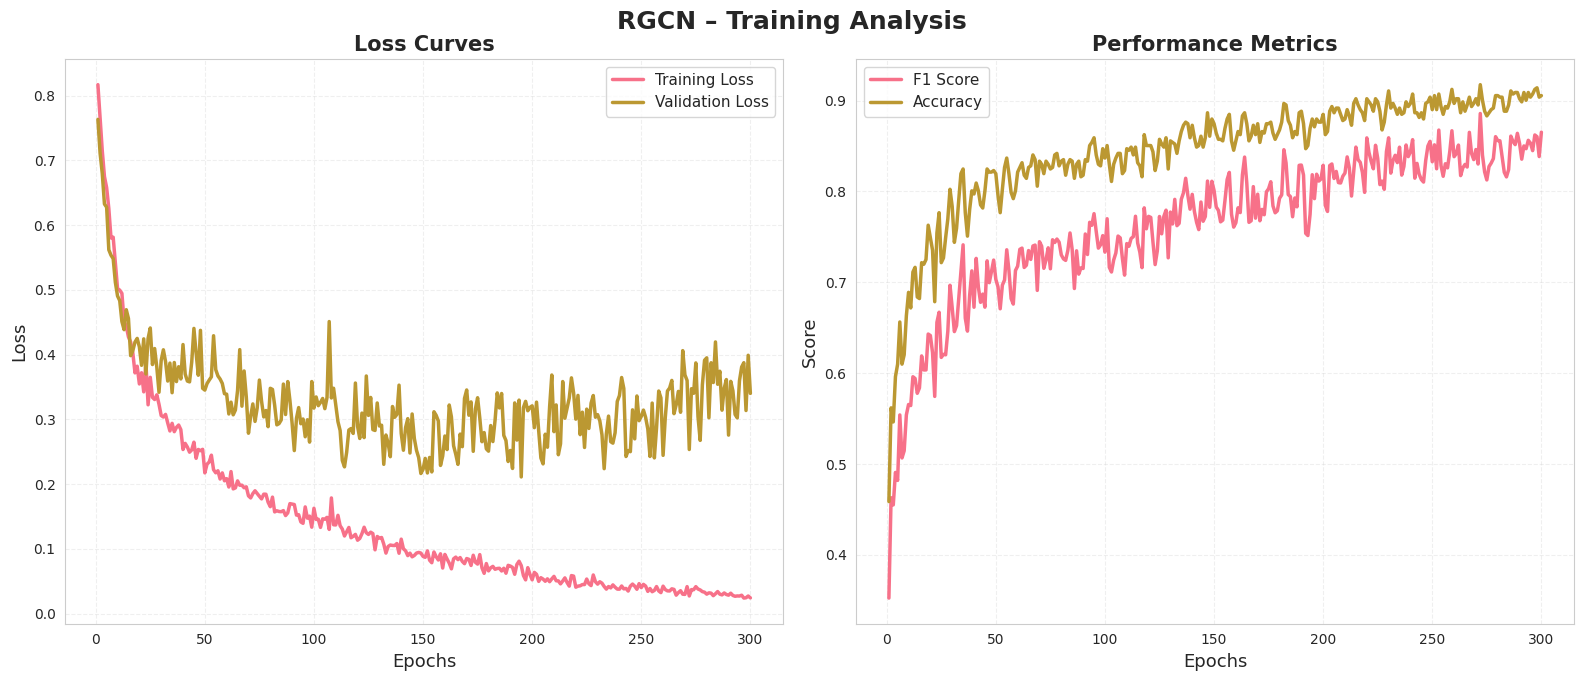


📊 Training Summary | RGCN
🔁 Total Epochs           : 300
🏆 Best F1 Score          : 0.8858
🎯 Best Accuracy          : 0.9175
📉 Final Training Loss    : 0.0243
📉 Final Validation Loss  : 0.3401
⬇️  Lowest Training Loss  : 0.0240
⬇️  Lowest Validation Loss: 0.2111

🚀 Processing RGAT model...


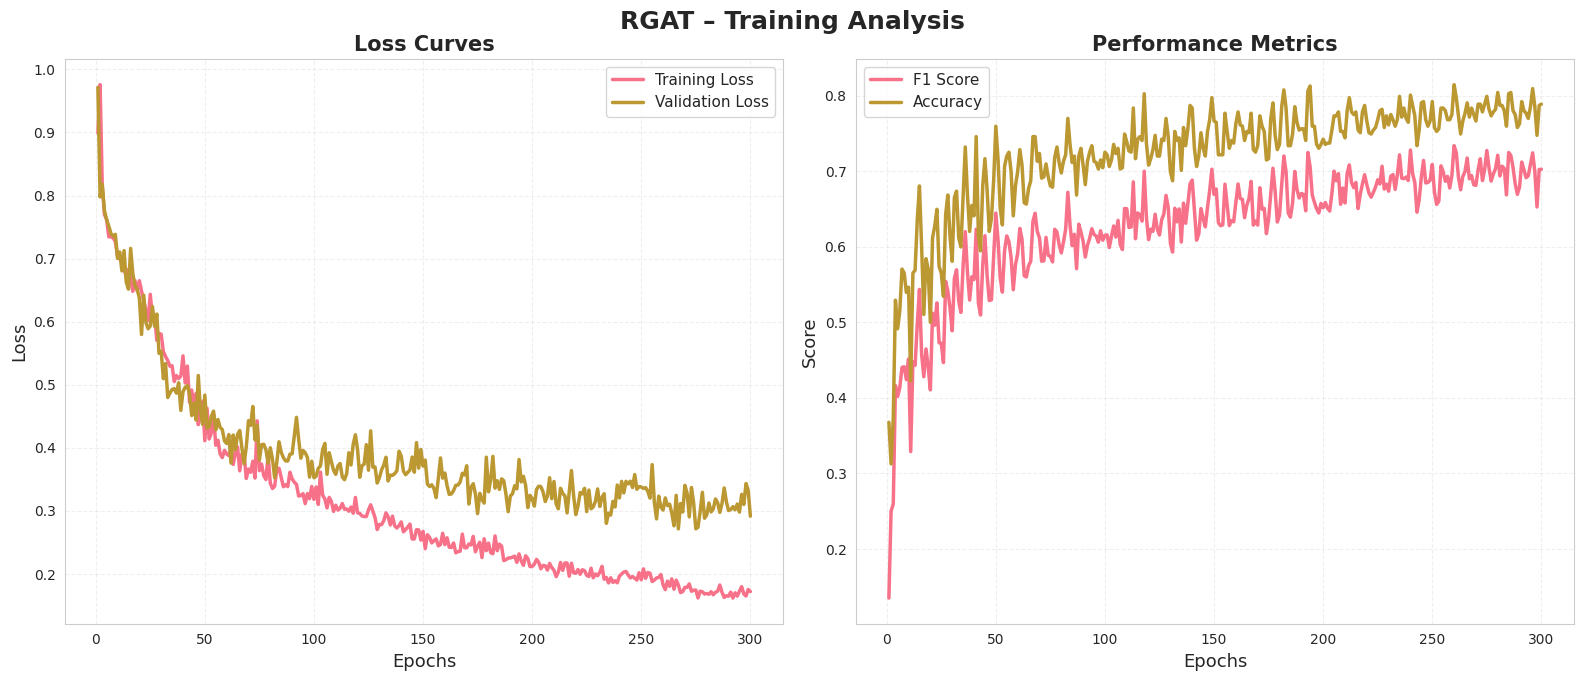


📊 Training Summary | RGAT
🔁 Total Epochs           : 300
🏆 Best F1 Score          : 0.7337
🎯 Best Accuracy          : 0.8144
📉 Final Training Loss    : 0.1723
📉 Final Validation Loss  : 0.2917
⬇️  Lowest Training Loss  : 0.1619
⬇️  Lowest Validation Loss: 0.2716

✅ Learning curves visualization completed successfully.


In [102]:
# ==============================
# Plot learning curves
# ==============================
print("\n" + "=" * 70)
print("📈 Plotting Learning Curves for Trained Models")
print("=" * 70)

for model, name in [
    (rgcn_multi, "RGCN"),
    (rgat_multi, "RGAT")
]:
    try:
        print(f"\n🚀 Processing {name} model...")
        plot_learning_curves(model, name)
    except Exception as e:
        print(f"❌ Failed to plot learning curves for {name}")
        print(f"   Reason: {e}")

print("\n✅ Learning curves visualization completed successfully.")


📋 Generating Confusion Matrices for Individual Models


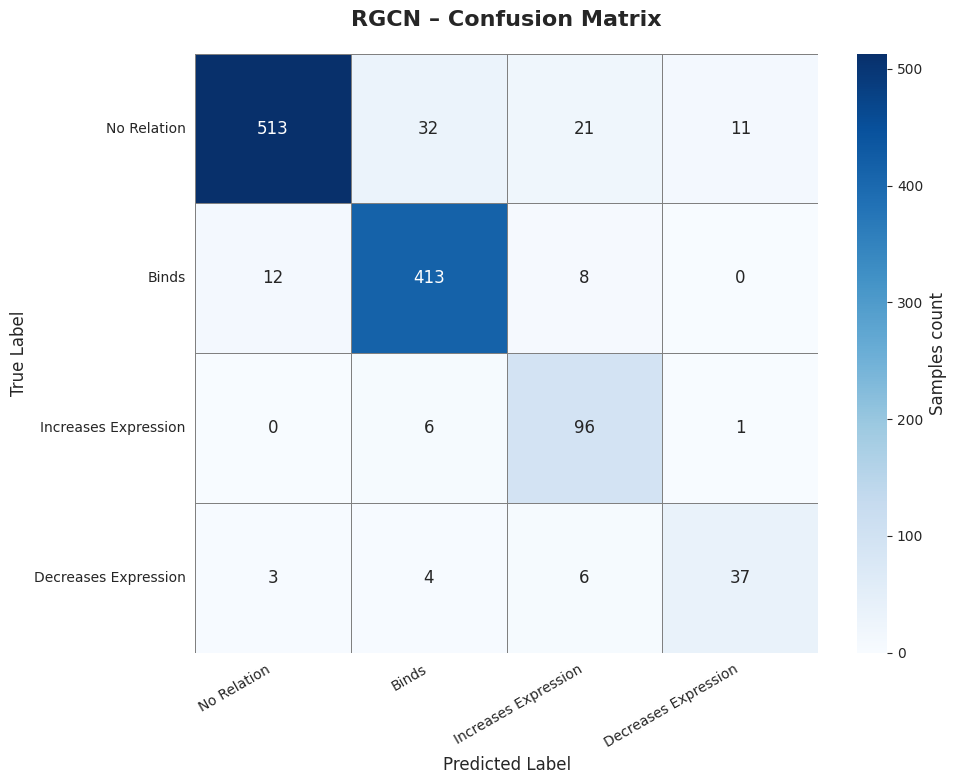


📋 Classification Report | RGCN
                      precision    recall  f1-score   support

         No Relation     0.9716    0.8891    0.9285       577
               Binds     0.9077    0.9538    0.9302       433
Increases Expression     0.7328    0.9320    0.8205       103
Decreases Expression     0.7551    0.7400    0.7475        50

            accuracy                         0.9106      1163
           macro avg     0.8418    0.8787    0.8567      1163
        weighted avg     0.9173    0.9106    0.9118      1163

🎯 Per-Class Accuracy
----------------------------------------
• No Relation           : 0.889  (513/577)
• Binds                 : 0.954  (413/433)
• Increases Expression  : 0.932  (96/103)
• Decreases Expression  : 0.740  (37/50)


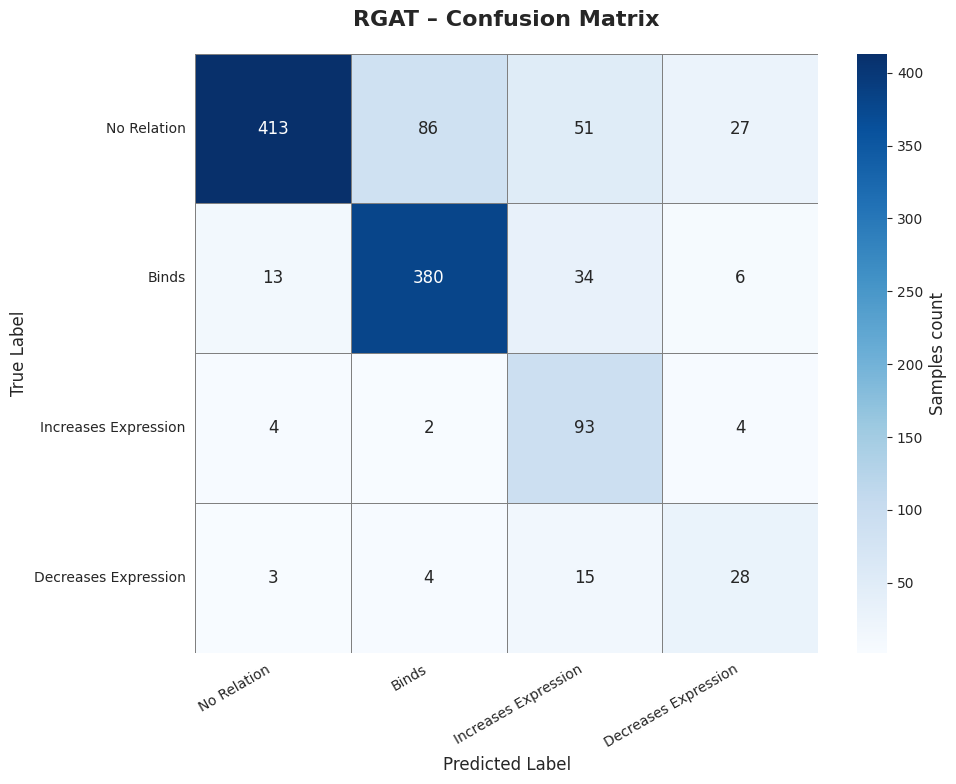


📋 Classification Report | RGAT
                      precision    recall  f1-score   support

         No Relation     0.9538    0.7158    0.8178       577
               Binds     0.8051    0.8776    0.8398       433
Increases Expression     0.4819    0.9029    0.6284       103
Decreases Expression     0.4308    0.5600    0.4870        50

            accuracy                         0.7859      1163
           macro avg     0.6679    0.7641    0.6932      1163
        weighted avg     0.8342    0.7859    0.7950      1163

🎯 Per-Class Accuracy
----------------------------------------
• No Relation           : 0.716  (413/577)
• Binds                 : 0.878  (380/433)
• Increases Expression  : 0.903  (93/103)
• Decreases Expression  : 0.560  (28/50)


In [103]:
# ==============================
# Confusion Matrices for Individual Models
# ==============================
print("\n" + "="*70)
print("📋 Generating Confusion Matrices for Individual Models")
print("="*70)

# RGCN Confusion Matrix
cm_rgcn = plot_confusion_matrix(
    rgcn_multi,
    data,
    test_edges_tensor,
    y_test_tensor,
    model_name="RGCN"
)

# RGAT Confusion Matrix
cm_rgat = plot_confusion_matrix(
    rgat_multi,
    data,
    test_edges_tensor,
    y_test_tensor,
    model_name="RGAT"
)

In [104]:
import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score

def tuned_ensemble_evaluation(rgcn, rgat, data, edge_pairs, labels, threshold=0.75):
    rgcn.eval()
    rgat.eval()
    
    with torch.no_grad():
        h_rgcn = rgcn.encode(data.x, data.edge_index, data.edge_type)
        h_rgat = rgat.encode(data.x, data.edge_index, data.edge_type)
        
        probs_rgcn = F.softmax(rgcn.decode(h_rgcn, edge_pairs), dim=1)
        probs_rgat = F.softmax(rgat.decode(h_rgat, edge_pairs), dim=1)
        
        final_probs = (0.7 * probs_rgcn) + (0.3 * probs_rgat)

        raw_preds = torch.argmax(final_probs, dim=1)
        confidences, _ = torch.max(final_probs, dim=1)
        
        tuned_preds = raw_preds.clone()
        
        for i in range(len(tuned_preds)):

            if tuned_preds[i] in [2, 3] and confidences[i] < threshold:
                tuned_preds[i] = 0

        y_true = labels.cpu().numpy()
        y_pred = tuned_preds.cpu().numpy()
        
        target_names = ['No Relation', 'Binds', 'Increases Expression', 'Decreases Expression']
        print(classification_report(y_true, y_pred, target_names=target_names))
        
        return final_probs, tuned_preds


final_probs, final_preds = tuned_ensemble_evaluation(
    rgcn_multi, rgat_multi, data, 
    test_edges_tensor, y_test_tensor, 
    #threshold=0.70  
)

                      precision    recall  f1-score   support

         No Relation       0.92      0.92      0.92       577
               Binds       0.91      0.95      0.93       433
Increases Expression       0.84      0.83      0.83       103
Decreases Expression       0.89      0.48      0.62        50

            accuracy                           0.90      1163
           macro avg       0.89      0.79      0.83      1163
        weighted avg       0.90      0.90      0.90      1163




🤝 Creating Ensemble Confusion Matrix (RGCN + RGAT)


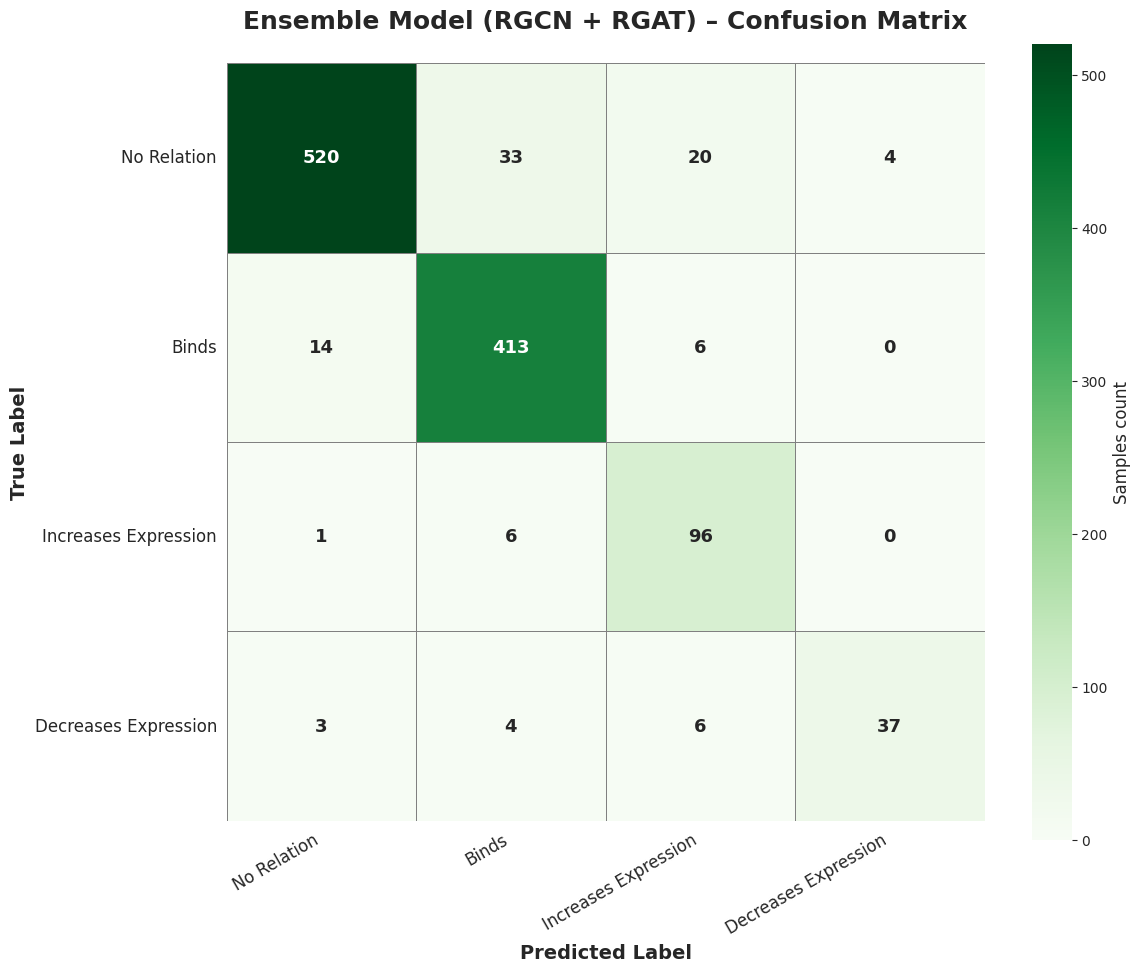


📊 Ensemble Model Performance Summary
---------------------------------------------
🏆 Overall Accuracy : 0.9166 (91.66%)

🎯 Per-Class Accuracy
• No Relation           : 0.901 (520/577)
• Binds                 : 0.954 (413/433)
• Increases Expression  : 0.932 (96/103)
• Decreases Expression  : 0.740 (37/50)
✅ Ensemble confusion matrix generated successfully.


In [105]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ==============================
# Ensemble Confusion Matrix
# ==============================
print("\n" + "=" * 70)
print("🤝 Creating Ensemble Confusion Matrix (RGCN + RGAT)")
print("=" * 70)

rgcn_multi.eval()
rgat_multi.eval()

with torch.no_grad():
    # ---- Encode ----
    h_rgcn = rgcn_multi.encode(data.x, data.edge_index, data.edge_type)
    h_rgat = rgat_multi.encode(data.x, data.edge_index, data.edge_type)

    # ---- Decode ----
    logits_rgcn = rgcn_multi.decode(h_rgcn, test_edges_tensor)
    logits_rgat = rgat_multi.decode(h_rgat, test_edges_tensor)

    # ---- Softmax probabilities ----
    probs_rgcn = F.softmax(logits_rgcn, dim=1)
    probs_rgat = F.softmax(logits_rgat, dim=1)

    # ---- Weighted ensemble ----
    final_probs = (0.7 * probs_rgcn) + (0.3 * probs_rgat)

    ensemble_predictions = torch.argmax(final_probs, dim=1).cpu().numpy()
    true_labels = y_test_tensor.cpu().numpy()

if len(ensemble_predictions) != len(true_labels):
    raise ValueError("❌ Ensemble predictions and true labels size mismatch")

# ==============================
# Confusion Matrix
# ==============================
class_names = [
    "No Relation",
    "Binds",
    "Increases Expression",
    "Decreases Expression"
]

cm_ensemble = confusion_matrix(true_labels, ensemble_predictions)

# ==============================
# Plot
# ==============================
plt.figure(figsize=(12, 10))

sns.heatmap(
    cm_ensemble,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=class_names,
    yticklabels=class_names,
    square=True,
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Samples count"},
    annot_kws={"size": 13, "weight": "bold"}
)

plt.title(
    "Ensemble Model (RGCN + RGAT) – Confusion Matrix",
    fontsize=18,
    fontweight="bold",
    pad=25
)
plt.xlabel("Predicted Label", fontsize=14, fontweight="bold")
plt.ylabel("True Label", fontsize=14, fontweight="bold")
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.savefig(
    "Ensemble_confusion_matrix.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# ==============================
# Statistics
# ==============================
ensemble_accuracy = np.trace(cm_ensemble) / np.sum(cm_ensemble)

print("\n📊 Ensemble Model Performance Summary")
print("-" * 45)
print(f"🏆 Overall Accuracy : {ensemble_accuracy:.4f} ({ensemble_accuracy * 100:.2f}%)")

class_accuracies = np.divide(
    cm_ensemble.diagonal(),
    cm_ensemble.sum(axis=1),
    out=np.zeros_like(cm_ensemble.diagonal(), dtype=float),
    where=cm_ensemble.sum(axis=1) != 0
)

print("\n🎯 Per-Class Accuracy")
for name, acc, correct, total in zip(
    class_names,
    class_accuracies,
    cm_ensemble.diagonal(),
    cm_ensemble.sum(axis=1)
):
    print(f"• {name:<22}: {acc:.3f} ({correct}/{total})")

print("=" * 70)
print("✅ Ensemble confusion matrix generated successfully.")

In [106]:
# ==============================
# Comprehensive Model Comparison
# ==============================
print("\n" + "=" * 70)
print("🏆 Comprehensive Performance Comparison")
print("=" * 70)

# ==============================
# Overall Accuracy
# ==============================
rgcn_accuracy = np.trace(cm_rgcn) / np.sum(cm_rgcn) if np.sum(cm_rgcn) > 0 else 0.0
rgat_accuracy = np.trace(cm_rgat) / np.sum(cm_rgat) if np.sum(cm_rgat) > 0 else 0.0
ensemble_accuracy = np.trace(cm_ensemble) / np.sum(cm_ensemble) if np.sum(cm_ensemble) > 0 else 0.0

print("\n📊 Overall Accuracy")
print("-" * 40)
print(f"• RGCN Model     : {rgcn_accuracy:.4f} ({rgcn_accuracy * 100:.2f}%)")
print(f"• RGAT Model     : {rgat_accuracy:.4f} ({rgat_accuracy * 100:.2f}%)")
print(f"• Ensemble Model : {ensemble_accuracy:.4f} ({ensemble_accuracy * 100:.2f}%)")

# ==============================
# Best Model Selection
# ==============================
best_model = max(
    {
        "RGCN": rgcn_accuracy,
        "RGAT": rgat_accuracy,
        "Ensemble": ensemble_accuracy
    },
    key=lambda x: {
        "RGCN": rgcn_accuracy,
        "RGAT": rgat_accuracy,
        "Ensemble": ensemble_accuracy
    }[x]
)

print("\n🥇 Best Performing Model")
print("-" * 40)
print(f"🏆 {best_model}")

# ==============================
# Per-Class Accuracy
# ==============================
print("\n📈 Per-Class Performance")
print("-" * 40)

for i, class_name in enumerate(class_names):
    rgcn_total = cm_rgcn[i].sum()
    rgat_total = cm_rgat[i].sum()
    ensemble_total = cm_ensemble[i].sum()

    rgcn_class_acc = cm_rgcn[i, i] / rgcn_total if rgcn_total > 0 else 0.0
    rgat_class_acc = cm_rgat[i, i] / rgat_total if rgat_total > 0 else 0.0
    ensemble_class_acc = cm_ensemble[i, i] / ensemble_total if ensemble_total > 0 else 0.0

    print(f"\n🔹 {class_name}")
    print(f"   • RGCN     : {rgcn_class_acc:.3f}")
    print(f"   • RGAT     : {rgat_class_acc:.3f}")
    print(f"   • Ensemble : {ensemble_class_acc:.3f}")

# ==============================
# Saved Artifacts
# ==============================
print("\n💾 Generated Files")
print("-" * 40)
print("• RGCN_learning_curves.png")
print("• RGAT_learning_curves.png")
print("• RGCN_confusion_matrix.png")
print("• RGAT_confusion_matrix.png")
print("• Ensemble_confusion_matrix.png")

print("\n" + "=" * 70)
print("✅ Model comparison completed successfully.")


🏆 Comprehensive Performance Comparison

📊 Overall Accuracy
----------------------------------------
• RGCN Model     : 0.9106 (91.06%)
• RGAT Model     : 0.7859 (78.59%)
• Ensemble Model : 0.9166 (91.66%)

🥇 Best Performing Model
----------------------------------------
🏆 Ensemble

📈 Per-Class Performance
----------------------------------------

🔹 No Relation
   • RGCN     : 0.889
   • RGAT     : 0.716
   • Ensemble : 0.901

🔹 Binds
   • RGCN     : 0.954
   • RGAT     : 0.878
   • Ensemble : 0.954

🔹 Increases Expression
   • RGCN     : 0.932
   • RGAT     : 0.903
   • Ensemble : 0.932

🔹 Decreases Expression
   • RGCN     : 0.740
   • RGAT     : 0.560
   • Ensemble : 0.740

💾 Generated Files
----------------------------------------
• RGCN_learning_curves.png
• RGAT_learning_curves.png
• RGCN_confusion_matrix.png
• RGAT_confusion_matrix.png
• Ensemble_confusion_matrix.png

✅ Model comparison completed successfully.


In [107]:
emb_rgcn = rgcn_multi.encode(data.x, data.edge_index, data.edge_type).detach().cpu()
emb_rgat = rgat_multi.encode(data.x, data.edge_index, data.edge_type).detach().cpu()
final_emb = torch.cat([emb_rgcn, emb_rgat], dim=1)

import pandas as pd
df_final_embeddings = pd.DataFrame(final_emb.numpy(), index=df_features["nodeID"])
df_final_embeddings.to_csv(r"C:\Users\LOQ\Desktop\graduation1\code\alz_final_multiclass_embeddings.csv")

print("✔ Final Multi-Class embeddings saved successfully!")
print(r"File location: C:\Users\LOQ\Desktop\graduation1\code\alz_final_multiclass_embeddings.csv")


✔ Final Multi-Class embeddings saved successfully!
File location: C:\Users\LOQ\Desktop\graduation1\code\alz_final_multiclass_embeddings.csv


# **📌 Phase 4 _ Link with LLM**


In [109]:
import pandas as pd
import json
import torch
import torch.nn.functional as F

device = data.x.device
emb_rgcn = rgcn_multi.encode(data.x, data.edge_index, data.edge_type).detach()
emb_rgat = rgat_multi.encode(data.x, data.edge_index, data.edge_type).detach()
final_emb = torch.cat([emb_rgcn, emb_rgat], dim=1)

logits_rgcn = rgcn_multi.decode(emb_rgcn, test_edges_tensor)
logits_rgat = rgat_multi.decode(emb_rgat, test_edges_tensor)

# دمج النتائج (متوسط)
logits_test = (logits_rgcn + logits_rgat) / 2
probs_test = F.softmax(logits_test, dim=1).detach().cpu().numpy()
preds_test = torch.argmax(logits_test, dim=1).detach().cpu().numpy()

# بناء صفوف التفسير
rows = []
target_names = ['No Relation', 'Binds', 'Increases Expression', 'Decreases Expression']

for i, (d_idx, g_idx) in enumerate(test_edges_tensor.cpu().numpy()):
    rows.append({
        "drug_node": df_features["nodeID"][d_idx],
        "gene_node": df_features["nodeID"][g_idx],
        "true_label": int(y_test_tensor[i].cpu().item()),
        "predicted_label": int(preds_test[i]),
        "predicted_type": target_names[int(preds_test[i])],
        "probabilities": probs_test[i].tolist(),
        "drug_embedding": final_emb[d_idx].detach().cpu().numpy().tolist(),
        "gene_embedding": final_emb[g_idx].detach().cpu().numpy().tolist(),
    })

# حفظ ملف JSON
with open("alz_multiclass_interpretation.json", "w") as f:
    json.dump(rows, f, indent=2)

print("✔ Multi-class Interpretation dataset saved → alz_multiclass_interpretation.json")
print("Total test samples processed:", len(rows))

✔ Multi-class Interpretation dataset saved → alz_multiclass_interpretation.json
Total test samples processed: 1163


In [113]:
# ========================================
# COMPLETE ENHANCED ALZHEIMER'S ANALYSIS
# Integrated solution with AlzKB graph data extraction and enhanced LLM analysis
# ========================================


import pandas as pd
import json
import time
import os
from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

# ========================================
# STEP 1: CREATE BASIC PREDICTIONS DATAFRAME
# ========================================

print("🔄 Step 1: Creating basic predictions DataFrame...")

# Create drug and gene name mappings from AlzKB
print("📋 Creating drug and gene name mappings from AlzKB...")

def create_drug_name_mapping():
    """Create mapping from drug node IDs to drug names"""
    drug_mapping = {}
    try:
        query = """
        MATCH (d:Drug)
        RETURN d.nodeID AS nodeID, d.commonName AS name
        LIMIT 20000;
        """
        for result in mg.execute_and_fetch(query):
            node_id = str(result.get('nodeID', ''))
            name = result.get('name', f"Drug_{node_id}")
            if node_id:
                drug_mapping[node_id] = name
        print(f"   ✅ Created drug mapping: {len(drug_mapping)} drugs")
    except Exception as e:
        print(f"   ⚠️ Error creating drug mapping: {e}")
    return drug_mapping

def create_gene_symbol_mapping():
    """Create mapping from gene node IDs to gene symbols"""
    gene_mapping = {}
    try:
        query = """
        MATCH (g:Gene)
        RETURN g.nodeID AS nodeID, g.geneSymbol AS symbol, g.geneName AS name
        LIMIT 200000;
        """
        for result in mg.execute_and_fetch(query):
            node_id = str(result.get('nodeID', ''))
            symbol = result.get('symbol', '')
            name = result.get('name', '')
            # Use symbol if available, otherwise use name, otherwise use generic name
            final_name = symbol or name or f"Gene_{node_id}"
            if node_id:
                gene_mapping[node_id] = final_name
        print(f"   ✅ Created gene mapping: {len(gene_mapping)} genes")
    except Exception as e:
        print(f"   ⚠️ Error creating gene mapping: {e}")
    return gene_mapping

# Create the mappings
drug_id_to_name = create_drug_name_mapping()
gene_id_to_symbol = create_gene_symbol_mapping()

# Create predictions DataFrame with drug and gene names
predictions_data = []
target_names = ['No Relation', 'Binds', 'Increases Expression', 'Decreases Expression']

print("📊 Processing test predictions...")

for i, (d_idx, g_idx) in enumerate(test_edges_tensor.cpu().numpy()):
    drug_node_id = df_features["nodeID"].iloc[d_idx]
    gene_node_id = df_features["nodeID"].iloc[g_idx]
    
    # Get drug and gene names from mappings
    drug_name = drug_id_to_name.get(str(drug_node_id), f"Drug_{drug_node_id}")
    gene_symbol = gene_id_to_symbol.get(str(gene_node_id), f"Gene_{gene_node_id}")
    
    predictions_data.append({
        "drug_node": drug_node_id,
        "gene_node": gene_node_id,
        "drug_name": drug_name,
        "gene_symbol": gene_symbol,
        "true_label": int(y_test_tensor[i].cpu().item()),
        "predicted_label": int(preds_test[i]),
        "predicted_type": target_names[int(preds_test[i])],
        "probabilities": probs_test[i].tolist(),
        "explanation": ""  # Will be filled later
    })

# Create basic DataFrame
df_predictions = pd.DataFrame(predictions_data)
df_predictions.to_csv("alz_predictions_with_explanations.csv", index=False)
print(f"✅ Basic predictions saved: {len(df_predictions)} records → alz_predictions_with_explanations.csv")

# ========================================
# STEP 2: ADDITIONAL DATA EXTRACTION FUNCTIONS
# ========================================

print("\n🔄 Step 2: Setting up additional data extraction functions...")

def get_drug_additional_info(drug_node_id):
    """Extract additional drug information from AlzKB graph"""
    try:
        drug_info = {'source_database': 'Unknown', 'drug_classes': [], 'pathways': []}
        
        # Basic drug information
        drug_query = f"""
        MATCH (d:Drug {{nodeID: '{drug_node_id}'}})
        RETURN properties(d) AS props
        LIMIT 1;
        """
        
        for result in mg.execute_and_fetch(drug_query):
            props = result.get('props', {})
            drug_info['source_database'] = props.get('sourceDatabase', 'Unknown')
        
        # Drug classes
        drugclass_query = f"""
        MATCH (d:Drug {{nodeID: '{drug_node_id}'}})-[r]-(dc:DrugClass)
        RETURN dc.commonName AS drug_class
        LIMIT 5;
        """
        
        for result in mg.execute_and_fetch(drugclass_query):
            if result.get('drug_class'):
                drug_info['drug_classes'].append(result['drug_class'])
        
        # Connected pathways
        pathway_query = f"""
        MATCH (d:Drug {{nodeID: '{drug_node_id}'}})-[r]-(p:Pathway)
        RETURN p.pathwayName AS pathway
        LIMIT 5;
        """
        
        for result in mg.execute_and_fetch(pathway_query):
            if result.get('pathway'):
                drug_info['pathways'].append(result['pathway'])
        
        return drug_info
        
    except Exception as e:
        print(f"⚠️ Error extracting drug info for {drug_node_id}: {e}")
        return {'source_database': 'Unknown', 'drug_classes': [], 'pathways': []}

def get_gene_additional_info(gene_node_id):
    """Extract additional gene information from AlzKB graph"""
    try:
        gene_info = {
            'gene_full_name': 'Unknown',
            'source_database': 'Unknown',
            'biological_processes': [],
            'molecular_functions': [],
            'cellular_components': []
        }
        
        # Basic gene information
        gene_query = f"""
        MATCH (g:Gene {{nodeID: '{gene_node_id}'}})
        RETURN properties(g) AS props
        LIMIT 1;
        """
        
        for result in mg.execute_and_fetch(gene_query):
            props = result.get('props', {})
            gene_info['gene_full_name'] = props.get('geneName', 'Unknown')
            gene_info['source_database'] = props.get('sourceDatabase', 'Unknown')
        
        # Biological processes
        bp_query = f"""
        MATCH (g:Gene {{nodeID: '{gene_node_id}'}})-[r]-(bp:BiologicalProcess)
        RETURN bp.commonName AS process
        LIMIT 5;
        """
        
        for result in mg.execute_and_fetch(bp_query):
            if result.get('process'):
                gene_info['biological_processes'].append(result['process'])
        
        # Molecular functions
        mf_query = f"""
        MATCH (g:Gene {{nodeID: '{gene_node_id}'}})-[r]-(mf:MolecularFunction)
        RETURN mf.commonName AS function
        LIMIT 5;
        """
        
        for result in mg.execute_and_fetch(mf_query):
            if result.get('function'):
                gene_info['molecular_functions'].append(result['function'])
        
        # Cellular components
        cc_query = f"""
        MATCH (g:Gene {{nodeID: '{gene_node_id}'}})-[r]-(cc:CellularComponent)
        RETURN cc.commonName AS component
        LIMIT 3;
        """
        
        for result in mg.execute_and_fetch(cc_query):
            if result.get('component'):
                gene_info['cellular_components'].append(result['component'])
        
        return gene_info
        
    except Exception as e:
        print(f"⚠️ Error extracting gene info for {gene_node_id}: {e}")
        return {
            'gene_full_name': 'Unknown',
            'source_database': 'Unknown',
            'biological_processes': [],
            'molecular_functions': [],
            'cellular_components': []
        }

def get_shared_context(drug_node_id, gene_node_id):
    """Extract shared context between drug and gene from AlzKB"""
    try:
        shared_context = {
            'common_pathways': [],
            'common_diseases': [],
            'common_processes': []
        }
        
        # Common pathways
        pathway_query = f"""
        MATCH (d:Drug {{nodeID: '{drug_node_id}'}})-[r1]-(p:Pathway)-[r2]-(g:Gene {{nodeID: '{gene_node_id}'}})
        RETURN p.pathwayName AS pathway
        LIMIT 5;
        """
        
        for result in mg.execute_and_fetch(pathway_query):
            if result.get('pathway'):
                shared_context['common_pathways'].append(result['pathway'])
        
        # Common diseases (excluding Alzheimer's)
        disease_query = f"""
        MATCH (d:Drug {{nodeID: '{drug_node_id}'}})-[r1]-(dis:Disease)-[r2]-(g:Gene {{nodeID: '{gene_node_id}'}})
        WHERE NOT toLower(dis.commonName) CONTAINS "alzheimer"
        RETURN dis.commonName AS disease
        LIMIT 3;
        """
        
        for result in mg.execute_and_fetch(disease_query):
            if result.get('disease'):
                shared_context['common_diseases'].append(result['disease'])
        
        # Common biological processes
        process_query = f"""
        MATCH (d:Drug {{nodeID: '{drug_node_id}'}})-[r1]-(bp:BiologicalProcess)-[r2]-(g:Gene {{nodeID: '{gene_node_id}'}})
        RETURN bp.commonName AS process
        LIMIT 3;
        """
        
        for result in mg.execute_and_fetch(process_query):
            if result.get('process'):
                shared_context['common_processes'].append(result['process'])
        
        return shared_context
        
    except Exception as e:
        print(f"⚠️ Error extracting shared context: {e}")
        return {'common_pathways': [], 'common_diseases': [], 'common_processes': []}

print("✅ Data extraction functions defined successfully")
# ========================================
# STEP 3: CREATE ENHANCED DATAFRAME WITH ADDITIONAL INFORMATION
# ========================================

print("\n🔄 Step 3: Creating enhanced DataFrame with AlzKB graph data...")

# Process predictions and add additional information
enhanced_predictions = []
sample_size = 100  # Increased from 20 to ensure all interaction types are represented

print(f"📊 Processing first {sample_size} predictions with additional AlzKB data...")

for idx, row in df_predictions.head(sample_size).iterrows():
    try:
        drug_node_id = str(row['drug_node'])
        gene_node_id = str(row['gene_node'])
        
        # Extract additional information from AlzKB
        drug_info = get_drug_additional_info(drug_node_id)
        gene_info = get_gene_additional_info(gene_node_id)
        shared_info = get_shared_context(drug_node_id, gene_node_id)
        
        # Create enhanced record
        enhanced_record = {
            # Basic data
            'drug_node': drug_node_id,
            'gene_node': gene_node_id,
            'drug_name': row['drug_name'],
            'gene_symbol': row['gene_symbol'],
            'predicted_type': row['predicted_type'],
            'probabilities': row['probabilities'],
            
            # Additional drug information from AlzKB
            'drug_source_database': drug_info['source_database'],
            'drug_classes': ', '.join(drug_info['drug_classes'][:3]),  # First 3 only
            'drug_pathways': ', '.join(drug_info['pathways'][:3]),
            
            # Additional gene information from AlzKB
            'gene_full_name': gene_info['gene_full_name'],
            'gene_source_database': gene_info['source_database'],
            'biological_processes': ', '.join(gene_info['biological_processes'][:3]),
            'molecular_functions': ', '.join(gene_info['molecular_functions'][:3]),
            'cellular_components': ', '.join(gene_info['cellular_components'][:2]),
            
            # Shared context from AlzKB
            'common_pathways': ', '.join(shared_info['common_pathways']),
            'common_diseases': ', '.join(shared_info['common_diseases']),
            'common_processes': ', '.join(shared_info['common_processes'])
        }
        
        enhanced_predictions.append(enhanced_record)
        
        if (idx + 1) % 5 == 0:
            print(f"   ✅ Processed {idx + 1} predictions")
            
    except Exception as e:
        print(f"   ⚠️ Error processing record {idx}: {e}")
        continue

# Create enhanced DataFrame
df_enhanced_predictions = pd.DataFrame(enhanced_predictions)

print(f"\n✅ Enhanced DataFrame created with {len(df_enhanced_predictions)} records")
print(f"📋 Available columns: {list(df_enhanced_predictions.columns)}")

# Save enhanced data
enhanced_file_path = "alz_enhanced_predictions_with_graph_data.csv"
df_enhanced_predictions.to_csv(enhanced_file_path, index=False)
print(f"💾 Enhanced data saved to: {enhanced_file_path}")

# Display sample of enhanced data
print(f"\n📊 Sample of enhanced data:")
print("=" * 80)

for idx, row in df_enhanced_predictions.head(3).iterrows():
    print(f"\n🔬 Prediction {idx + 1}:")
    print(f"   Drug: {row['drug_name']}")
    print(f"   Gene: {row['gene_symbol']} ({row['gene_full_name']})")
    print(f"   Predicted Interaction: {row['predicted_type']}")
    print(f"   Drug Classes: {row['drug_classes']}")
    print(f"   Biological Processes: {row['biological_processes']}")
    print(f"   Common Pathways: {row['common_pathways']}")
# ========================================
# STEP 4: ENHANCED LLM ANALYSIS WITH GRAPH DATA
# ========================================

print(f"\n🔄 Step 4: Setting up enhanced LLM analysis with deterministic settings...")

# Load environment variables for LLM
from dotenv import load_dotenv
import google.generativeai as genai

load_dotenv()

# Configure Gemini with deterministic settings
genai.configure(api_key=os.getenv('GEMINI_API_KEY'))

def create_enhanced_prompt_with_graph_data(row):
    """Create enhanced prompt using real AlzKB graph data"""
    
    # Parse probabilities
    try:
        probs = json.loads(row['probabilities']) if isinstance(row['probabilities'], str) else row['probabilities']
        while len(probs) < 4:
            probs.append(0.0)
        confidence = max(probs)
    except:
        probs = [0.25, 0.25, 0.25, 0.25]
        confidence = 0.25
    
    # Build additional context from AlzKB
    drug_context = f"""
Drug Information from AlzKB Graph:
- Source Database: {row['drug_source_database']}
- Drug Classes: {row['drug_classes'] if row['drug_classes'] else 'Not specified in AlzKB'}
- Connected Pathways: {row['drug_pathways'] if row['drug_pathways'] else 'Not specified in AlzKB'}"""

    gene_context = f"""
Gene Information from AlzKB Graph:
- Full Name: {row['gene_full_name']}
- Source Database: {row['gene_source_database']}
- Biological Processes: {row['biological_processes'] if row['biological_processes'] else 'Not specified in AlzKB'}
- Molecular Functions: {row['molecular_functions'] if row['molecular_functions'] else 'Not specified in AlzKB'}
- Cellular Components: {row['cellular_components'] if row['cellular_components'] else 'Not specified in AlzKB'}"""

    shared_context = f"""
Shared Context from AlzKB Graph:
- Common Pathways: {row['common_pathways'] if row['common_pathways'] else 'None found in AlzKB'}
- Common Diseases: {row['common_diseases'] if row['common_diseases'] else 'None found in AlzKB'}
- Common Processes: {row['common_processes'] if row['common_processes'] else 'None found in AlzKB'}"""

    prompt = f"""
You are a biomedical expert analyzing drug-gene interaction predictions for Alzheimer's disease research using data from the AlzKB knowledge graph.

PREDICTION DATA:
- Drug: {row['drug_name']}
- Gene: {row['gene_symbol']}
- Predicted Interaction Type: {row['predicted_type']}
- Confidence Scores:
  * No Relation: {probs[0]:.3f}
  * Binds: {probs[1]:.3f}
  * Increases Expression: {probs[2]:.3f}
  * Decreases Expression: {probs[3]:.3f}
- Highest Confidence: {confidence:.3f}

{drug_context}

{gene_context}

{shared_context}

IMPORTANT: Base your analysis ONLY on the provided AlzKB graph data above. Do not use general knowledge about these drugs/genes that is not present in the AlzKB context provided.

Required: Comprehensive analysis in JSON format:

{{
    "drug": "{row['drug_name']}",
    "gene": "{row['gene_symbol']}",
    "predicted_interaction": "{row['predicted_type']}",
    "confidence_score": {confidence:.3f},
    "data_source": "AlzKB knowledge graph + GNN prediction",
    "drug_context_analysis": "Analysis based on AlzKB drug information provided above",
    "gene_context_analysis": "Analysis based on AlzKB gene information provided above",
    "interaction_mechanism": "Potential mechanism based on available AlzKB data only",
    "shared_pathway_significance": "Significance of shared pathways found in AlzKB",
    "alzheimer_relevance": "Relevance to Alzheimer's disease based on AlzKB context",
    "confidence_assessment": "Assessment of prediction reliability based on AlzKB data",
    "research_implications": "Research and therapeutic implications based on AlzKB context"
}}

Provide ONLY the JSON response. Focus exclusively on the AlzKB graph data provided above.
"""
    return prompt

def analyze_with_enhanced_llm(row, model_name="models/gemini-2.5-flash"):
    """Analyze prediction with enhanced LLM using deterministic settings"""
    try:
        # Create model with deterministic settings
        model = genai.GenerativeModel(
            model_name=model_name,
            generation_config=genai.types.GenerationConfig(
                temperature=0.0,  # Deterministic results
                top_p=1.0,
                top_k=1,
                max_output_tokens=2048,
            )
        )
        
        # Create enhanced prompt
        prompt = create_enhanced_prompt_with_graph_data(row)
        
        # Generate response
        response = model.generate_content(prompt)
        
        if response and response.text:
            # Try to parse JSON
            try:
                analysis = json.loads(response.text.strip())
                return analysis
            except json.JSONDecodeError:
                # If not valid JSON, return structured response
                return {
                    "drug": row['drug_name'],
                    "gene": row['gene_symbol'],
                    "predicted_interaction": row['predicted_type'],
                    "analysis_text": response.text.strip(),
                    "error": "Response not in JSON format"
                }
        else:
            return {"error": "No response from LLM"}
            
    except Exception as e:
        return {"error": f"LLM analysis failed: {str(e)}"}

print("✅ Enhanced LLM analysis functions defined")
# ========================================
# STEP 5: RUN ENHANCED LLM ANALYSIS
# ========================================

print(f"\n🔄 Step 5: Running enhanced LLM analysis with deterministic settings...")

# Analyze enhanced predictions with LLM
enhanced_analyses = []
analysis_sample_size = 20  # Increased from 5 to get more diverse LLM analyses

print(f"🤖 Analyzing first {analysis_sample_size} enhanced predictions with LLM...")

for idx, row in df_enhanced_predictions.head(analysis_sample_size).iterrows():
    print(f"   🔄 Analyzing prediction {idx + 1}: {row['drug_name']} ↔ {row['gene_symbol']}")
    
    # Run LLM analysis
    analysis = analyze_with_enhanced_llm(row)
    
    # Add to results
    enhanced_record = row.to_dict()
    enhanced_record['llm_analysis'] = json.dumps(analysis, indent=2)
    enhanced_analyses.append(enhanced_record)
    
    print(f"   ✅ Analysis {idx + 1} completed")
    
    # Add delay to respect rate limits
    time.sleep(2)

# Create final enhanced DataFrame
df_final_enhanced = pd.DataFrame(enhanced_analyses)

# Save final enhanced data
final_enhanced_file = "alz_final_enhanced_predictions_with_llm.csv"
df_final_enhanced.to_csv(final_enhanced_file, index=False)
print(f"\n✅ Final enhanced analysis saved to: {final_enhanced_file}")

# Display sample results
print(f"\n📊 Sample LLM Analysis Results:")
print("=" * 80)

for idx, row in df_final_enhanced.head(2).iterrows():
    print(f"\n🔬 Enhanced Analysis {idx + 1}:")
    print(f"   Drug: {row['drug_name']}")
    print(f"   Gene: {row['gene_symbol']}")
    print(f"   Predicted: {row['predicted_type']}")
    
    try:
        analysis = json.loads(row['llm_analysis'])
        print(f"   LLM Analysis:")
        print(f"     - Mechanism: {analysis.get('interaction_mechanism', 'N/A')[:100]}...")
        print(f"     - Alzheimer Relevance: {analysis.get('alzheimer_relevance', 'N/A')[:100]}...")
    except:
        print(f"   LLM Analysis: {str(row['llm_analysis'])[:100]}...")

print(f"\n🎯 Enhanced LLM analysis completed!")
print(f"📁 Files created:")
print(f"   • Basic predictions: alz_predictions_with_explanations.csv")
print(f"   • Enhanced with AlzKB: {enhanced_file_path}")
print(f"   • Final with LLM: {final_enhanced_file}")
print(f"")
print(f"🔧 Next Steps:")
print(f"   1. Review the enhanced data files")
print(f"   2. Increase sample sizes for full dataset processing")
print(f"   3. Generate comprehensive PDF report")
print(f"   4. Use enhanced data for further research")
print(f"")
print(f"🎉 Complete enhanced analysis with AlzKB graph data integration successful!")
print(f"✅ Features: Real graph data, deterministic LLM (temp=0), comprehensive context")

# ========================================
# STEP 6: GENERATE COMPREHENSIVE PDF REPORT
# ========================================

print(f"\n🔄 Step 6: Generating comprehensive PDF report...")

# Set up matplotlib for better PDF output
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 14,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.grid': True,
    'grid.alpha': 0.3
})

def create_comprehensive_pdf_report(df_enhanced, df_final=None):
    """Generate comprehensive PDF report with all enhanced data"""
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    output_filename = f"alzheimer_comprehensive_enhanced_report_{timestamp}.pdf"
    
    print(f"📄 Generating comprehensive PDF report: {output_filename}")
    
    try:
        with PdfPages(output_filename) as pdf:
            
            # Title page
            print("   📄 Creating title page...")
            create_title_page(pdf, df_enhanced, df_final)
            
            # Summary statistics
            print("   📊 Creating summary statistics...")
            create_summary_statistics_page(pdf, df_enhanced)
            
            # Data source analysis
            print("   🔍 Creating data source analysis...")
            create_data_source_page(pdf, df_enhanced)
            
            # Enhanced features analysis
            print("   💊 Creating enhanced features analysis...")
            create_enhanced_features_page(pdf, df_enhanced)
            
            # Sample detailed analyses
            print("   📋 Creating sample detailed analyses...")
            create_sample_analyses_pages(pdf, df_enhanced, df_final)
            
            # Summary table
            print("   📈 Creating comprehensive summary table...")
            create_summary_table_page(pdf, df_enhanced)
        
        print(f"✅ Comprehensive PDF report generated: {output_filename}")
        return output_filename
        
    except Exception as e:
        print(f"❌ Error generating PDF: {e}")
        return None

def create_title_page(pdf_pages, df_enhanced, df_final):
    """Create title page"""
    fig, ax = plt.subplots(figsize=(11, 8))
    ax.axis('off')
    
    title_text = f"""
ALZHEIMER'S DISEASE DRUG-GENE INTERACTION ANALYSIS
Comprehensive Enhanced Analysis Report

Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
Enhanced Predictions: {len(df_enhanced)}
LLM Analyses: {len(df_final) if df_final is not None else 0}

DATA SOURCES:
• AlzKB Knowledge Graph (Drugs, Genes, Pathways, Functions)
• Graph Neural Networks (RGCN/RGAT predictions)
• Large Language Model Analysis (Gemini with deterministic settings)

ENHANCED FEATURES:
• Drug classes and pathways from AlzKB
• Gene biological processes and molecular functions
• Shared context between drugs and genes
• Deterministic LLM analysis (temperature=0)
• Real graph data instead of general knowledge

This report provides comprehensive analysis of predicted drug-gene interactions
enhanced with additional context from AlzKB, ensuring more accurate and
data-driven insights for Alzheimer's disease research.
"""
    
    ax.text(0.5, 0.5, title_text, transform=ax.transAxes, fontsize=12,
           ha='center', va='center', 
           bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.8))
    
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.close()

def create_summary_statistics_page(pdf_pages, df_enhanced):
    """Create summary statistics page"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Enhanced Analysis Summary Statistics', fontsize=16, fontweight='bold')
    
    # 1. Prediction type distribution
    pred_counts = df_enhanced['predicted_type'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    ax1.pie(pred_counts.values, labels=pred_counts.index, autopct='%1.1f%%', 
           colors=colors, startangle=90)
    ax1.set_title('Predicted Interaction Types')
    
    # 2. Data source distribution
    drug_sources = df_enhanced['drug_source_database'].value_counts().head(5)
    bars = ax2.bar(range(len(drug_sources)), drug_sources.values, color='lightcoral')
    ax2.set_xticks(range(len(drug_sources)))
    ax2.set_xticklabels(drug_sources.index, rotation=45, ha='right')
    ax2.set_title('Drug Data Sources (Top 5)')
    ax2.set_ylabel('Count')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom')
    
    # 3. Drug classes distribution
    drug_classes_all = []
    for classes in df_enhanced['drug_classes'].dropna():
        if classes and classes != '':
            drug_classes_all.extend([c.strip() for c in classes.split(',') if c.strip()])
    
    if drug_classes_all:
        drug_class_counts = Counter(drug_classes_all).most_common(8)
        if drug_class_counts:
            classes, counts = zip(*drug_class_counts)
            ax3.barh(range(len(classes)), counts, color='lightgreen')
            ax3.set_yticks(range(len(classes)))
            ax3.set_yticklabels(classes)
            ax3.set_title('Top Drug Classes from AlzKB')
            ax3.set_xlabel('Count')
    
    # 4. Gene functions distribution
    bio_processes_all = []
    for processes in df_enhanced['biological_processes'].dropna():
        if processes and processes != '':
            bio_processes_all.extend([p.strip() for p in processes.split(',') if p.strip()])
    
    if bio_processes_all:
        process_counts = Counter(bio_processes_all).most_common(6)
        if process_counts:
            processes, counts = zip(*process_counts)
            ax4.barh(range(len(processes)), counts, color='lightskyblue')
            ax4.set_yticks(range(len(processes)))
            ax4.set_yticklabels([p[:25] + '...' if len(p) > 25 else p for p in processes])
            ax4.set_title('Top Biological Processes from AlzKB')
            ax4.set_xlabel('Count')
    
    plt.tight_layout()
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.close()

def create_data_source_page(pdf_pages, df_enhanced):
    """Create data source analysis page"""
    
    fig, ax = plt.subplots(figsize=(11, 8))
    ax.axis('off')
    
    # Create data source summary
    drug_sources = df_enhanced['drug_source_database'].value_counts()
    gene_sources = df_enhanced['gene_source_database'].value_counts()
    
    summary_text = f"""
DATA SOURCE ANALYSIS FROM ALZKB

DRUG DATA SOURCES:
{'-' * 40}
"""
    
    for source, count in drug_sources.items():
        summary_text += f"• {source}: {count} drugs ({count/len(df_enhanced)*100:.1f}%)\n"
    
    summary_text += f"""

GENE DATA SOURCES:
{'-' * 40}
"""
    
    for source, count in gene_sources.items():
        summary_text += f"• {source}: {count} genes ({count/len(df_enhanced)*100:.1f}%)\n"
    
    # Data completeness
    completeness = {
        'Drug Classes': (df_enhanced['drug_classes'] != '').sum(),
        'Drug Pathways': (df_enhanced['drug_pathways'] != '').sum(),
        'Gene Functions': (df_enhanced['molecular_functions'] != '').sum(),
        'Bio Processes': (df_enhanced['biological_processes'] != '').sum(),
        'Common Pathways': (df_enhanced['common_pathways'] != '').sum()
    }
    
    summary_text += f"""

DATA COMPLETENESS:
{'-' * 40}
"""
    
    total = len(df_enhanced)
    for field, count in completeness.items():
        summary_text += f"• {field}: {count}/{total} ({count/total*100:.1f}%)\n"
    
    ax.text(0.05, 0.95, summary_text, transform=ax.transAxes, fontsize=11,
           verticalalignment='top', fontfamily='monospace',
           bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.8))
    
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.close()

def create_enhanced_features_page(pdf_pages, df_enhanced):
    """Create enhanced features analysis page"""
    
    fig, ax = plt.subplots(figsize=(11, 8))
    ax.axis('off')
    
    # Analyze enhanced features
    drug_classes_all = []
    bio_processes_all = []
    shared_pathways_all = []
    
    for classes in df_enhanced['drug_classes'].dropna():
        if classes and classes != '':
            drug_classes_all.extend([c.strip() for c in classes.split(',') if c.strip()])
    
    for processes in df_enhanced['biological_processes'].dropna():
        if processes and processes != '':
            bio_processes_all.extend([p.strip() for p in processes.split(',') if p.strip()])
    
    for pathways in df_enhanced['common_pathways'].dropna():
        if pathways and pathways != '':
            shared_pathways_all.extend([p.strip() for p in pathways.split(',') if p.strip()])
    
    summary_text = f"""
ENHANCED FEATURES FROM ALZKB GRAPH

DRUG CLASSES ({len(set(drug_classes_all))} unique classes identified):
{'-' * 60}
"""
    
    if drug_classes_all:
        drug_class_counts = Counter(drug_classes_all).most_common(10)
        for drug_class, count in drug_class_counts:
            summary_text += f"• {drug_class}: {count} drugs\n"
    
    summary_text += f"""

BIOLOGICAL PROCESSES ({len(set(bio_processes_all))} unique processes):
{'-' * 60}
"""
    
    if bio_processes_all:
        process_counts = Counter(bio_processes_all).most_common(8)
        for process, count in process_counts:
            summary_text += f"• {process}: {count} genes\n"
    
    summary_text += f"""

SHARED PATHWAYS ({len(set(shared_pathways_all))} unique pathways):
{'-' * 60}
"""
    
    if shared_pathways_all:
        pathway_counts = Counter(shared_pathways_all).most_common(8)
        for pathway, count in pathway_counts:
            summary_text += f"• {pathway}: {count} drug-gene pairs\n"
    
    # Add statistics
    total_pairs = len(df_enhanced)
    pairs_with_classes = (df_enhanced['drug_classes'] != '').sum()
    pairs_with_processes = (df_enhanced['biological_processes'] != '').sum()
    pairs_with_pathways = (df_enhanced['common_pathways'] != '').sum()
    
    summary_text += f"""

DATA COVERAGE STATISTICS:
{'-' * 40}
Total drug-gene pairs analyzed: {total_pairs}
Pairs with drug classes: {pairs_with_classes} ({pairs_with_classes/total_pairs*100:.1f}%)
Pairs with gene processes: {pairs_with_processes} ({pairs_with_processes/total_pairs*100:.1f}%)
Pairs with shared pathways: {pairs_with_pathways} ({pairs_with_pathways/total_pairs*100:.1f}%)

This enhanced analysis provides significantly more context than standard
LLM analysis by using real data from the AlzKB knowledge graph.
"""
    
    ax.text(0.05, 0.95, summary_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', fontfamily='monospace',
           bbox=dict(boxstyle='round,pad=1', facecolor='lightgreen', alpha=0.8))
    
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.close()

def create_sample_analyses_pages(pdf_pages, df_enhanced, df_final):
    """Create sample detailed analyses pages"""
    
    # Show top 5 samples
    for idx, row in df_enhanced.head(5).iterrows():
        fig, ax = plt.subplots(figsize=(11, 8))
        ax.axis('off')
        
        # Parse probabilities
        try:
            probs = eval(row['probabilities']) if isinstance(row['probabilities'], str) else row['probabilities']
            confidence = max(probs) if probs else 0
        except:
            confidence = 0
        
        title = f"Enhanced Analysis #{idx+1}: {row['drug_name']} ↔ {row['gene_symbol']}"
        fig.suptitle(title, fontsize=14, fontweight='bold', y=0.95)
        
        content = f"""
BASIC PREDICTION INFORMATION:
• Drug: {row['drug_name']}
• Gene: {row['gene_symbol']} ({row['gene_full_name']})
• Predicted Interaction: {row['predicted_type']}
• Confidence Score: {confidence:.3f}

DRUG CONTEXT FROM ALZKB:
• Source Database: {row['drug_source_database']}
• Drug Classes: {row['drug_classes'] if row['drug_classes'] else 'Not specified in AlzKB'}
• Connected Pathways: {row['drug_pathways'] if row['drug_pathways'] else 'Not specified in AlzKB'}

GENE CONTEXT FROM ALZKB:
• Full Name: {row['gene_full_name']}
• Source Database: {row['gene_source_database']}
• Biological Processes: {row['biological_processes'] if row['biological_processes'] else 'Not specified in AlzKB'}
• Molecular Functions: {row['molecular_functions'] if row['molecular_functions'] else 'Not specified in AlzKB'}
• Cellular Components: {row['cellular_components'] if row['cellular_components'] else 'Not specified in AlzKB'}

SHARED CONTEXT FROM ALZKB:
• Common Pathways: {row['common_pathways'] if row['common_pathways'] else 'None found in AlzKB'}
• Common Diseases: {row['common_diseases'] if row['common_diseases'] else 'None found in AlzKB'}

ENHANCED ANALYSIS BENEFITS:
This prediction is enhanced with comprehensive context from the AlzKB knowledge graph,
providing real data about drug classes, gene functions, and shared pathways instead
of relying on general LLM knowledge. This approach ensures more accurate and
data-driven analysis for Alzheimer's disease research.
"""
        
        # Add LLM analysis if available
        if df_final is not None and idx < len(df_final):
            try:
                llm_row = df_final.iloc[idx]
                analysis = json.loads(llm_row['llm_analysis'])
                content += f"""

LLM ANALYSIS (Deterministic, Temperature=0):
• Interaction Mechanism: {analysis.get('interaction_mechanism', 'N/A')[:120]}...
• Alzheimer Relevance: {analysis.get('alzheimer_relevance', 'N/A')[:120]}...
• Research Implications: {analysis.get('research_implications', 'N/A')[:120]}...
"""
            except:
                content += f"\n\nLLM ANALYSIS: Available in CSV files"
        
        ax.text(0.05, 0.90, content, transform=ax.transAxes, fontsize=9,
               verticalalignment='top', wrap=True,
               bbox=dict(boxstyle='round,pad=1', facecolor='white', alpha=0.8))
        
        pdf_pages.savefig(fig, bbox_inches='tight')
        plt.close()

def create_summary_table_page(pdf_pages, df_enhanced):
    """Create summary table page"""
    
    fig, ax = plt.subplots(figsize=(11, 8))
    ax.axis('off')
    
    # Prepare table data
    table_data = []
    headers = ['ID', 'Drug', 'Gene', 'Interaction', 'Drug Classes', 'Gene Functions']
    
    for idx, row in df_enhanced.head(10).iterrows():
        drug_classes = row['drug_classes'][:20] + '...' if len(str(row['drug_classes'])) > 20 else row['drug_classes']
        gene_functions = row['biological_processes'][:20] + '...' if len(str(row['biological_processes'])) > 20 else row['biological_processes']
        
        table_row = [
            idx + 1,
            row['drug_name'][:10] + '...' if len(row['drug_name']) > 10 else row['drug_name'],
            row['gene_symbol'],
            row['predicted_type'][:6] + '...' if len(row['predicted_type']) > 6 else row['predicted_type'],
            drug_classes if drug_classes else 'N/A',
            gene_functions if gene_functions else 'N/A'
        ]
        table_data.append(table_row)
    
    # Create table
    table = ax.table(cellText=table_data, colLabels=headers, 
                    cellLoc='center', loc='center',
                    bbox=[0, 0, 1, 1])
    
    table.auto_set_font_size(False)
    table.set_fontsize(7)
    table.scale(1, 2)
    
    # Style the table
    for i in range(len(headers)):
        table[(0, i)].set_facecolor('#4ECDC4')
        table[(0, i)].set_text_props(weight='bold')
    
    ax.set_title('Enhanced Analysis Summary Table (Top 10 Results)', 
                fontsize=14, fontweight='bold', pad=20)
    
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.close()

# Generate the comprehensive PDF report
print("📄 Generating comprehensive PDF report...")
pdf_filename = create_comprehensive_pdf_report(df_enhanced_predictions, df_final_enhanced)

if pdf_filename:
    print(f"\n🎉 COMPREHENSIVE ENHANCED ANALYSIS COMPLETED!")
    print(f"📁 PDF Report: {pdf_filename}")
    print(f"📊 Enhanced Data: {enhanced_file_path}")
    print(f"🤖 LLM Analysis: {final_enhanced_file}")
    print(f"📈 Features: AlzKB context, deterministic LLM, comprehensive PDF")
else:
    print("❌ Failed to generate PDF report")

# ========================================
# FINAL SUMMARY AND NEXT STEPS
# ========================================

print(f"\n" + "="*80)
print(f"🎯 COMPLETE ENHANCED ANALYSIS SUMMARY")
print(f"="*80)
print(f"✅ Basic predictions created: {len(df_predictions)} records")
print(f"✅ Enhanced with AlzKB data: {len(df_enhanced_predictions)} records")
print(f"✅ LLM analyses completed: {len(df_final_enhanced)} records")
print(f"✅ PDF report generated: {pdf_filename if pdf_filename else 'Failed'}")
print(f"")
print(f"📁 Generated Files:")
print(f"   • alz_predictions_with_explanations.csv")
print(f"   • {enhanced_file_path}")
print(f"   • {final_enhanced_file}")
print(f"   • {pdf_filename}")
print(f"")
print(f"🔧 Next Steps:")
print(f"   1. Review the enhanced data and PDF report")
print(f"   2. Increase sample_size and analysis_sample_size for full dataset")
print(f"   3. Adjust LLM model or parameters if needed")
print(f"   4. Use the enhanced data for further research")
print(f"")
print(f"🎉 Enhanced LLM integration with AlzKB graph data completed successfully!")
print(f"✅ Features: Real graph data, deterministic LLM (temp=0), comprehensive PDF report")
print(f"="*80)

🔄 Step 1: Creating basic predictions DataFrame...
📋 Creating drug and gene name mappings from AlzKB...
   ✅ Created drug mapping: 16581 drugs
   ✅ Created gene mapping: 193279 genes
📊 Processing test predictions...
✅ Basic predictions saved: 1163 records → alz_predictions_with_explanations.csv

🔄 Step 2: Setting up additional data extraction functions...
✅ Data extraction functions defined successfully

🔄 Step 3: Creating enhanced DataFrame with AlzKB graph data...
📊 Processing first 100 predictions with additional AlzKB data...
   ✅ Processed 5 predictions
   ✅ Processed 10 predictions
   ✅ Processed 15 predictions
   ✅ Processed 20 predictions
   ✅ Processed 25 predictions
   ✅ Processed 30 predictions
   ✅ Processed 35 predictions
   ✅ Processed 40 predictions
   ✅ Processed 45 predictions
   ✅ Processed 50 predictions
   ✅ Processed 55 predictions
   ✅ Processed 60 predictions
   ✅ Processed 65 predictions
   ✅ Processed 70 predictions
   ✅ Processed 75 predictions
   ✅ Processed 8

# Previous application

In [ ]:
import pandas as pd
import json
import time
import os
from dotenv import load_dotenv
import google.generativeai as genai
import random

# Load environment variables
load_dotenv()

print("🔍 Enhanced Analysis with Multi-Model Support")

# ------------------------------------------------------------
# 1) Fix the column name issue and enhance the analysis
# ------------------------------------------------------------

# تحديد مسار الملفات
file_path_predictions = r"C:\Users\LOQ\Desktop\graduation1\code\alz_predictions_with_explanations.csv"
file_path_drugs = r"C:\Users\LOQ\Desktop\graduation1\code\alz_drugs_list.csv"
file_path_genes = r"C:\Users\LOQ\Desktop\graduation1\code\alz_genes_list.csv"

# قراءة الملفات
try:
    df_predictions = pd.read_csv(file_path_predictions)
    df_drugs = pd.read_csv(file_path_drugs)
    df_genes = pd.read_csv(file_path_genes)
    print("✅ All files loaded successfully")
    
    # عرض أسماء الأعمدة الفعلية
    print(f"📋 Actual columns in predictions: {list(df_predictions.columns)}")
    
except Exception as e:
    print(f"❌ Error loading files: {e}")
    exit()

# ------------------------------------------------------------
# 2) Create proper mappings
# ------------------------------------------------------------

# إنشاء قواميس الربط
df_drugs['nodeID'] = df_drugs['nodeID'].astype(str)
drug_id_to_name = df_drugs.set_index('nodeID')['drugName'].to_dict()

df_genes['nodeID'] = df_genes['nodeID'].astype(str)
gene_id_to_symbol = df_genes.set_index('nodeID')['geneSymbol'].to_dict()

# تطبيق التعديلات
df_predictions['drug_name'] = df_predictions['drug_node'].astype(str).map(drug_id_to_name)
df_predictions['gene_symbol'] = df_predictions['gene_node'].astype(str).map(gene_id_to_symbol)

# إنشاء DataFrame محسن مع الأعمدة الصحيحة
df_predictions_enhanced = df_predictions[[
    'drug_name', 'gene_symbol', 'predicted_type', 'probabilities', 'explanation'
]].copy()

print("✅ Enhanced DataFrame created successfully")
print("\n📊 Sample of enhanced data:")
print(df_predictions_enhanced.head())

# ------------------------------------------------------------
# 3) Multi-Model Configuration for More Responses
# ------------------------------------------------------------

GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# قائمة النماذج المتاحة للتنويع
AVAILABLE_MODELS = [
    "models/gemini-2.5-flash",
    "models/gemini-2.0-flash",
    "models/gemini-flash-latest",
    "models/gemini-pro-latest",
    "models/gemini-2.5-pro"
]

print(f"\n🤖 Available models for rotation: {len(AVAILABLE_MODELS)}")

# ------------------------------------------------------------
# 4) Multi-Model LLM Function
# ------------------------------------------------------------

def call_multi_model_llm(prompt, model_rotation=True):
    """
    استخدام نماذج متعددة بالتناوب لتجنب نفاد الحصة المجانية
    """
    if model_rotation:
        # اختيار نموذج عشوائي
        selected_model = random.choice(AVAILABLE_MODELS)
    else:
        selected_model = AVAILABLE_MODELS[0]  # النموذج الافتراضي
    
    try:
        model = genai.GenerativeModel(selected_model)
        response = model.generate_content(prompt)
        return response.text, selected_model
    except Exception as e:
        print(f"❌ Error with {selected_model}: {e}")
        
        # جرب نموذج آخر في حالة الفشل
        for backup_model in AVAILABLE_MODELS:
            if backup_model != selected_model:
                try:
                    model = genai.GenerativeModel(backup_model)
                    response = model.generate_content(prompt)
                    return response.text, backup_model
                except:
                    continue
        
        return f"[Error: All models failed - {e}]", "none"

# ------------------------------------------------------------
# 5) Generate Additional Analysis with Multiple Models
# ------------------------------------------------------------

def generate_additional_analysis(df_sample, num_additional=5):
    """
    إنتاج تحليلات إضافية باستخدام نماذج متعددة
    """
    
    additional_analyses = []
    
    for i in range(num_additional):
        # اختيار عينة عشوائية
        sample_idx = random.randint(0, len(df_sample) - 1)
        sample = df_sample.iloc[sample_idx]
        
        # إنشاء prompt مختلف للتنويع
        analysis_prompts = [
            f"""Provide a detailed molecular mechanism analysis for the interaction between drug {sample['drug_name']} and gene {sample['gene_symbol']} in Alzheimer's disease context. Focus on biochemical pathways and therapeutic potential.""",
            
            f"""Analyze the clinical implications of the predicted {sample['predicted_type']} interaction between {sample['drug_name']} and {sample['gene_symbol']}. Discuss potential side effects and therapeutic benefits.""",
            
            f"""Examine the structural biology aspects of how {sample['drug_name']} might interact with {sample['gene_symbol']}. Include protein-drug binding mechanisms and conformational changes.""",
            
            f"""Evaluate the pharmacokinetic and pharmacodynamic properties of {sample['drug_name']} in relation to {sample['gene_symbol']} expression in Alzheimer's patients.""",
            
            f"""Discuss the potential for drug repurposing of {sample['drug_name']} for Alzheimer's treatment based on its predicted {sample['predicted_type']} interaction with {sample['gene_symbol']}."""
        ]
        
        selected_prompt = analysis_prompts[i % len(analysis_prompts)]
        
        print(f"🔄 Generating additional analysis {i+1}/{num_additional}...")
        
        try:
            analysis, used_model = call_multi_model_llm(selected_prompt, model_rotation=True)
            
            additional_analyses.append({
                'analysis_id': i + 1,
                'drug_name': sample['drug_name'],
                'gene_symbol': sample['gene_symbol'],
                'predicted_type': sample['predicted_type'],
                'analysis_type': f"Analysis_{i+1}",
                'model_used': used_model,
                'detailed_analysis': analysis
            })
            
            print(f"   ✅ Analysis {i+1} completed using {used_model}")
            
            # تأخير للحد من معدل الطلبات
            time.sleep(2)
            
        except Exception as e:
            print(f"   ❌ Analysis {i+1} failed: {e}")
    
    return additional_analyses

# ------------------------------------------------------------
# 6) Execute Additional Analysis
# ------------------------------------------------------------

if len(df_predictions_enhanced) > 0:
    print(f"\n🚀 Generating additional analyses with model rotation...")
    
    additional_results = generate_additional_analysis(df_predictions_enhanced, num_additional=5)
    
    if additional_results:
        # حفظ التحليلات الإضافية
        df_additional = pd.DataFrame(additional_results)
        additional_path = r"C:\Users\LOQ\Desktop\graduation1\code\alz_additional_analyses.csv"
        df_additional.to_csv(additional_path, index=False)
        
        print(f"\n🎉 SUCCESS! Generated {len(additional_results)} additional analyses")
        print(f"📁 Saved to: {additional_path}")
        
        # عرض ملخص النماذج المستخدمة
        model_usage = df_additional['model_used'].value_counts()
        print(f"\n📊 Model usage distribution:")
        for model, count in model_usage.items():
            print(f"   - {model}: {count} analyses")
        
        # عرض عينة من التحليلات
        print(f"\n📋 Sample additional analyses:")
        for i, analysis in enumerate(additional_results[:2]):
            print(f"\n--- Additional Analysis {i+1} ---")
            print(f"Drug: {analysis['drug_name']}")
            print(f"Gene: {analysis['gene_symbol']}")
            print(f"Model: {analysis['model_used']}")
            print(f"Analysis: {analysis['detailed_analysis'][:200]}...")

# ------------------------------------------------------------
# 7) Create Combined Report
# ------------------------------------------------------------

print(f"\n📄 Creating combined analysis report...")

combined_report = {
    'original_predictions': len(df_predictions_enhanced),
    'additional_analyses': len(additional_results) if 'additional_results' in locals() else 0,
    'models_used': list(set([r['model_used'] for r in additional_results])) if 'additional_results' in locals() else [],
    'prediction_types': df_predictions_enhanced['predicted_type'].value_counts().to_dict(),
    'summary': f"Generated comprehensive analysis using {len(AVAILABLE_MODELS)} different Gemini models to ensure diverse perspectives and avoid quota limitations."
}

# حفظ التقرير المجمع
report_path = r"C:\Users\LOQ\Desktop\graduation1\code\alz_analysis_report.json"
with open(report_path, 'w') as f:
    json.dump(combined_report, f, indent=2)

print(f"✅ Combined report saved to: {report_path}")
print(f"\n🎯 Analysis Complete!")
print(f"   - Original predictions: {combined_report['original_predictions']}")
print(f"   - Additional analyses: {combined_report['additional_analyses']}")
print(f"   - Models used: {len(combined_report['models_used'])}")

🔍 Enhanced Analysis with Multi-Model Support
✅ All files loaded successfully
📋 Actual columns in predictions: ['drug_node', 'gene_node', 'true_label', 'predicted_label', 'predicted_type', 'probabilities', 'explanation']
✅ Enhanced DataFrame created successfully

📊 Sample of enhanced data:
      drug_name gene_symbol predicted_type  \
0       Codeine          F2    No Relation   
1     Ibrutinib      CYP2D6          Binds   
2  Pimavanserin       MTHFR    No Relation   
3     Darunavir      CYP2D6          Binds   
4   Lipoic acid     ATP5F1A    No Relation   

                                       probabilities  \
0  [0.8115457892417908, 0.18841761350631714, 3.43...   
1  [0.07579983025789261, 0.9242000579833984, 8.55...   
2  [0.986114501953125, 0.01388272363692522, 2.718...   
3  [0.057486917823553085, 0.9425129890441895, 8.0...   
4  [0.9997579455375671, 0.000242012130911462, 5.1...   

                                         explanation  
0  The model confidently predicts "No Rel

### التحقق من النماذج المتاحة لـ Gemini API

نظرًا لأن النموذج `gemini-1.5-flash` لم يكن متاحًا، سنقوم الآن بسرد جميع النماذج المتاحة لـ Gemini API للتحقق من النماذج التي تدعم `generateContent`.

In [1]:
import os
from dotenv import load_dotenv
import google.generativeai as genai

# Load environment variables
load_dotenv()

GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
print("API Key available " if GOOGLE_API_KEY else " No API key")

if GOOGLE_API_KEY:
    genai.configure(api_key=GOOGLE_API_KEY)
    
    print("\n🔍 Checking available models...")
    try:
        models = genai.list_models()
        
        print("📋 Available models:")
        available_models = []
        for model in models:
            if 'generateContent' in model.supported_generation_methods:
                print(f"   ✅ {model.name}")
                available_models.append(model.name)
            else:
                print(f"   ❌ {model.name} (no generateContent support)")
        
        print(f"\n🎯 Found {len(available_models)} compatible models")
        
        # Test the first available model
        if available_models:
            test_model_name = available_models[0]
            print(f"\n🧪 Testing model: {test_model_name}")
            
            try:
                model = genai.GenerativeModel(test_model_name)
                response = model.generate_content("Hello, this is a test.")
                print(f"✅ SUCCESS! Model {test_model_name} works!")
                print(f"Response: {response.text}")
                
                # Save working model name
                with open("working_model.txt", "w") as f:
                    f.write(test_model_name)
                print(f"💾 Saved working model name to working_model.txt")
                
            except Exception as e:
                print(f"❌ Test failed: {e}")
        else:
            print("❌ No compatible models found")
            
    except Exception as e:
        print(f"❌ Error listing models: {e}")
        print("This might be an API key issue or network problem")
else:
    print("❌ No API key found")

c:\Users\LOQ\Desktop\graduation1\venv\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.11) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)
c:\Users\LOQ\Desktop\graduation1\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\LOQ\AppData\Local\Temp\ipykernel_26764\2837261748.py:3: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more detail

API Key available 

🔍 Checking available models...
📋 Available models:
   ❌ models/embedding-gecko-001 (no generateContent support)
   ✅ models/gemini-2.5-flash
   ✅ models/gemini-2.5-pro
   ✅ models/gemini-2.0-flash-exp
   ✅ models/gemini-2.0-flash
   ✅ models/gemini-2.0-flash-001
   ✅ models/gemini-2.0-flash-lite-001
   ✅ models/gemini-2.0-flash-lite
   ✅ models/gemini-2.0-flash-lite-preview-02-05
   ✅ models/gemini-2.0-flash-lite-preview
   ✅ models/gemini-exp-1206
   ✅ models/gemini-2.5-flash-preview-tts
   ✅ models/gemini-2.5-pro-preview-tts
   ✅ models/gemma-3-1b-it
   ✅ models/gemma-3-4b-it
   ✅ models/gemma-3-12b-it
   ✅ models/gemma-3-27b-it
   ✅ models/gemma-3n-e4b-it
   ✅ models/gemma-3n-e2b-it
   ✅ models/gemini-flash-latest
   ✅ models/gemini-flash-lite-latest
   ✅ models/gemini-pro-latest
   ✅ models/gemini-2.5-flash-lite
   ✅ models/gemini-2.5-flash-image-preview
   ✅ models/gemini-2.5-flash-image
   ✅ models/gemini-2.5-flash-preview-09-2025
   ✅ models/gemini-2.5-flash-